In this assignment, you'll implement an L-layered deep neural network and train it on the MNIST dataset. The MNIST dataset contains scanned images of handwritten digits, along with their correct classification labels (between 0-9). MNIST's name comes from the fact that it is a modified subset of two data sets collected by NIST, the United States' National Institute of Standards and Technology.<br>

## Data Preparation

In [1]:
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sklearn
import sklearn.datasets
import scipy
from PIL import Image
from scipy import ndimage


%matplotlib inline

The MNIST dataset we use here is 'mnist.pkl.gz' which is divided into training, validation and test data. The following function <i> load_data() </i> unpacks the file and extracts the training, validation and test data.

In [2]:
def load_data():
    f = gzip.open('mnist.pkl.gz', 'rb')
    f.seek(0)
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

Let's see how the data looks:

In [3]:
training_data, validation_data, test_data = load_data()

In [4]:
training_data

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([5, 0, 4, ..., 8, 4, 8], dtype=int64))

In [5]:
# shape of data
print(training_data[0].shape)
print(training_data[1].shape)

(50000, 784)
(50000,)


In [6]:
print("The feature dataset is:" + str(training_data[0]))
print("The target dataset is:" + str(training_data[1]))
print("The number of examples in the training dataset is:" + str(len(training_data[0])))
print("The number of points in a single input is:" + str(len(training_data[0][1])))

The feature dataset is:[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
The target dataset is:[5 0 4 ... 8 4 8]
The number of examples in the training dataset is:50000
The number of points in a single input is:784


Now, as discussed earlier in the lectures, the target variable is converted to a one hot matrix. We use the function <i> one_hot </i> to convert the target dataset to one hot encoding.

In [7]:
def one_hot(j):
    # input is the target dataset of shape (m,) where m is the number of data points
    # returns a 2 dimensional array of shape (10, m) where each target value is converted to a one hot encoding
    # Look at the next block of code for a better understanding of one hot encoding
    n = j.shape[0]
    new_array = np.zeros((10, n))
    index = 0
    for res in j:
        new_array[res][index] = 1.0
        index = index + 1
    return new_array

In [8]:
data = np.array([0,9])
print(data.shape)
one_hot(data)

(2,)


array([[1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.]])

The following function data_wrapper() will convert the dataset into the desired shape and also convert the ground truth labels to one_hot matrix.

In [9]:
def data_wrapper():
    tr_d, va_d, te_d = load_data()
    
    training_inputs = np.array(tr_d[0][:]).T
    training_results = np.array(tr_d[1][:])
    train_set_y = one_hot(training_results)
    
    validation_inputs = np.array(va_d[0][:]).T
    validation_results = np.array(va_d[1][:])
    validation_set_y = one_hot(validation_results)
    
    test_inputs = np.array(te_d[0][:]).T
    test_results = np.array(te_d[1][:])
    test_set_y = one_hot(test_results)
    
    return (training_inputs, train_set_y, test_inputs, test_set_y)

In [10]:
train_set_x, train_set_y, test_set_x, test_set_y = data_wrapper()

In [11]:
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x shape: (784, 50000)
train_set_y shape: (10, 50000)
test_set_x shape: (784, 10000)
test_set_y shape: (10, 10000)


We can see that the data_wrapper has converted the training and validation data into numpy array of desired shapes. Let's convert the actual labels into a dataframe to see if the one hot conversions are correct.

In [12]:
y = pd.DataFrame(train_set_y)

In [13]:
print("The target dataset is:" + str(training_data[1]))
print("The one hot encoding dataset is:")
y

The target dataset is:[5 0 4 ... 8 4 8]
The one hot encoding dataset is:


,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now let us visualise the dataset. Feel free to change the index to see if the training data has been correctly tagged.

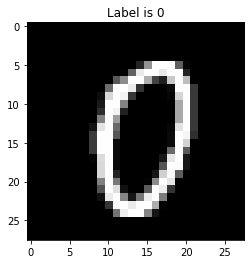

In [14]:
index  = 1000
k = train_set_x[:,index]
k = k.reshape((28, 28))
plt.title('Label is {label}'.format(label= training_data[1][index]))
plt.imshow(k, cmap='gray')

# Feedforward

### sigmoid
This is one of the activation functions. It takes the cumulative input to the layer, the matrix **Z**, as the input. Upon application of the **`sigmoid`** function, the output matrix **H** is calculated. Also, **Z** is stored as the variable **sigmoid_memory** since it will be later used in backpropagation.You use _[np.exp()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html)_ here in the following way. The exponential gets applied to all the elements of Z.

In [15]:
def sigmoid(Z):
    
    # Z is numpy array of shape (n, m) where n is number of neurons in the layer and m is the number of samples 
    # sigmoid_memory is stored as it is used later on in backpropagation
    
    H = 1/(1+np.exp(-Z))
    sigmoid_memory = Z
    
    return H, sigmoid_memory

In [16]:
Z = np.arange(8).reshape(4,2)
print ("sigmoid(Z) = " + str(sigmoid(Z)))

sigmoid(Z) = (array([[0.5       , 0.73105858],
       [0.88079708, 0.95257413],
       [0.98201379, 0.99330715],
       [0.99752738, 0.99908895]]), array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]]))


### relu
This is one of the activation functions. It takes the cumulative input to the layer, matrix **Z** as the input. Upon application of the **`relu`** function, matrix **H** which is the output matrix is calculated. Also, **Z** is stored as **relu_memory** which will be later used in backpropagation. You use _[np.maximum()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.maximum.html)_ here in the following way.

In [17]:
def relu(Z):
    # Z is numpy array of shape (n, m) where n is number of neurons in the layer and m is the number of samples 
    # relu_memory is stored as it is used later on in backpropagation
    
    H = np.maximum(0,Z)
    print(H)
    
    assert(H.shape == Z.shape)
    
    relu_memory = Z 
    return H, relu_memory

In [18]:
Z = np.array([1, 3, -1, -4, -5, 7, 9, 18]).reshape(4,2)

print(Z)
#print ("relu(Z) = " + str(relu(Z)))

[[ 1  3]
 [-1 -4]
 [-5  7]
 [ 9 18]]


In [19]:
relu(Z)

[[ 1  3]
 [ 0  0]
 [ 0  7]
 [ 9 18]]


(array([[ 1,  3],
        [ 0,  0],
        [ 0,  7],
        [ 9, 18]]), array([[ 1,  3],
        [-1, -4],
        [-5,  7],
        [ 9, 18]]))

### softmax
This is the activation of the last layer. It takes the cumulative input to the layer, matrix **Z** as the input. Upon application of the **`softmax`** function, the output matrix **H** is calculated. Also, **Z** is stored as **softmax_memory** which will be later used in backpropagation. You use _[np.exp()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html)_ and _[np.sum()](https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.sum.html)_ here in the following way. The exponential gets applied to all the elements of Z.

In [20]:
def softmax(Z):
    # Z is numpy array of shape (n, m) where n is number of neurons in the layer and m is the number of samples 
    # softmax_memory is stored as it is used later on in backpropagation
   
    Z_exp = np.exp(Z)

    Z_sum = np.sum(Z_exp,axis = 0, keepdims = True)
    
    H = Z_exp/Z_sum  #normalising step
    softmax_memory = Z
    
    return H, softmax_memory

In [21]:
Z = np.array([[11,19,10], [12, 21, 23]])

In [22]:
#Z = np.array(np.arange(30)).reshape(10,3)
H, softmax_memory = softmax(Z)
print(H)
print(softmax_memory)

[[2.68941421e-01 1.19202922e-01 2.26032430e-06]
 [7.31058579e-01 8.80797078e-01 9.99997740e-01]]
[[11 19 10]
 [12 21 23]]


### initialize_parameters
Let's now create a function **`initialize_parameters`** which initializes the weights and biases of the various layers. One way to initialise is to set all the parameters to 0. This is not a considered a good strategy as all the neurons will behave the same way and it'll defeat the purpose of deep networks. Hence, we initialize the weights randomly to very small values but not zeros. The biases are initialized to 0. Note that the **`initialize_parameters`** function initializes the parameters for all the layers in one `for` loop. 

The inputs to this function is a list named `dimensions`. The length of the list is the number layers in the network + 1 (the plus one is for the input layer, rest are hidden + output). The first element of this list is the dimensionality or length of the input (784 for the MNIST dataset). The rest of the list contains the number of neurons in the corresponding (hidden and output) layers.

For example `dimensions = [784, 3, 7, 10]` specifies a network for the MNIST dataset with two hidden layers and a 10-dimensional softmax output.

Also, notice that the parameters are returned in a dictionary. This will help you in implementing the feedforward through the layer and the backprop throught the layer at once.

In [23]:
def initialize_parameters(dimensions):

    # dimensions is a list containing the number of neuron in each layer in the network
    # It returns parameters which is a python dictionary containing the parameters "W1", "b1", ..., "WL", "bL":

    np.random.seed(2)
    parameters = {}
    L = len(dimensions)            # number of layers in the network + 1

    for l in range(1, L): 
        parameters['W' + str(l)] = np.random.randn(dimensions[l], dimensions[l-1]) * 0.1
        parameters['b' + str(l)] = np.zeros((dimensions[l], 1)) 
        
        assert(parameters['W' + str(l)].shape == (dimensions[l], dimensions[l-1]))
        assert(parameters['b' + str(l)].shape == (dimensions[l], 1))

        
    return parameters

In [24]:
dimensions  = [784, 3,7,10]
parameters = initialize_parameters(dimensions)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
# print("W3 = " + str(parameters["W3"]))
# print("b3 = " + str(parameters["b3"]))

W1 = [[-0.04167578 -0.00562668 -0.21361961 ... -0.06168445  0.03213358
  -0.09464469]
 [-0.05301394 -0.1259207   0.16775441 ... -0.03284246 -0.05623108
   0.01179136]
 [ 0.07386378 -0.15872956  0.01532001 ... -0.08428557  0.10040469
   0.00545832]]
b1 = [[0.]
 [0.]
 [0.]]
W2 = [[ 0.06650944 -0.19626047  0.2112715 ]
 [-0.28074571 -0.13967752  0.02641189]
 [ 0.10925169  0.06646016  0.08565535]
 [-0.11058228  0.03715795  0.13440124]
 [-0.16421272 -0.1153127   0.02013163]
 [ 0.13985659  0.07228733 -0.10717236]
 [-0.05673344 -0.03663499 -0.15460347]]
b2 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


### layer_forward

The function **`layer_forward`** implements the forward propagation for a certain layer 'l'. It calculates the cumulative input into the layer **Z** and uses it to calculate the output of the layer **H**. It takes **H_prev, W, b and the activation function** as inputs and stores the **linear_memory, activation_memory** in the variable **memory** which will be used later in backpropagation. 

<br> You have to first calculate the **Z**(using the forward propagation equation), **linear_memory**(H_prev, W, b) and then calculate **H, activation_memory**(Z) by applying activation functions - **`sigmoid`**, **`relu`** and **`softmax`** on **Z**.

<br> Note that $$H^{L-1}$$ is referred here as H_prev. You might want to use _[np.dot()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)_ to carry out the matrix multiplication.

In [25]:
#Graded

def layer_forward(H_prev, W, b, activation = 'relu'):

    # H_prev is of shape (size of previous layer, number of examples)
    # W is weights matrix of shape (size of current layer, size of previous layer)
    # b is bias vector of shape (size of the current layer, 1)
    # activation is the activation to be used for forward propagation : "softmax", "relu", "sigmoid"

    # H is the output of the activation function 
    # memory is a python dictionary containing "linear_memory" and "activation_memory"
    
    if activation == "sigmoid":
        Z = np.dot(W,H_prev)+b
        linear_memory = (H_prev, W, b)
        H, activation_memory = sigmoid(Z)
 
    elif activation == "softmax":
        Z = np.dot(W,H_prev)+b
        linear_memory = (H_prev, W, b)
        H, activation_memory = softmax(Z)
    
    elif activation == "relu":
        Z = np.dot(W,H_prev)+b
        linear_memory = (H_prev, W, b)
        H, activation_memory = relu(Z)
        
    assert (H.shape == (W.shape[0], H_prev.shape[1]))
    memory = (linear_memory, activation_memory)

    return H, memory

In [26]:
# verify
# l-1 has two neurons, l has three, m = 5
# H_prev is (l-1, m)
# W is (l, l-1)
# b is (l, 1)
# H should be (l, m)
H_prev = np.array([[1,0, 5, 10, 2], [2, 5, 3, 10, 2]])
W_sample = np.array([[10, 5], [2, 0], [1, 0]])
b_sample = np.array([10, 5, 0]).reshape((3, 1))

H = layer_forward(H_prev, W_sample, b_sample, activation="sigmoid")[0]
H

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.99908895, 0.99330715, 0.99999969, 1.        , 0.99987661],
       [0.73105858, 0.5       , 0.99330715, 0.9999546 , 0.88079708]])

You should get:<br>
    array([[1.        , 1.        , 1.        , 1.        , 1.        ],<br>
      [0.99908895, 0.99330715, 0.99999969, 1.        , 0.99987661],<br>
       [0.73105858, 0.5       , 0.99330715, 0.9999546 , 0.88079708]])
    

### L_layer_forward
**`L_layer_forward`** performs one forward pass through the whole network for all the training samples (note that we are feeding all training examples in one single batch). Use the **`layer_forward`** you have created above here to perform the feedforward for layers 1 to 'L-1' in the for loop with the activation **`relu`**. The last layer having a different activation **`softmax`** is calculated outside the loop. Notice that the **memory** is appended to **memories** for all the layers. These will be used in the backward order during backpropagation.

In [27]:
#Graded

def L_layer_forward(X, parameters):

    # X is input data of shape (input size, number of examples)
    # parameters is output of initialize_parameters()
    
    # HL is the last layer's post-activation value
    # memories is the list of memory containing (for a relu activation, for example):
    # - every memory of relu forward (there are L-1 of them, indexed from 1 to L-1), 
    # - the memory of softmax forward (there is one, indexed L) 

    memories = []
    H = X
    
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement relu layer (L-1) times as the Lth layer is the softmax layer
    for l in range(1, L):
        H_Prev = H
        H, memory = layer_forward(H_Prev,parameters['W'+str(l)], parameters['b'+str(l)],activation = 'relu' )
        memories.append(memory)
       
    
    # Implement the final softmax layer
    # HL here is the final prediction P as specified in the lectures
    
    
    
    HL, memory = layer_forward(H, parameters['W'+str(L)], parameters['b'+str(L)], activation='softmax')
        
    memories.append(memory)

    assert(HL.shape == (10, X.shape[1]))
    
   
            
    return HL, memories

In [28]:
x_sample = train_set_x[:, 10:20]
print(x_sample.shape)
print(len(train_set_x[10:20]))

(784, 10)
10


In [29]:
for key in parameters:
    print(key)
    print(parameters[key].shape)

W1
(3, 784)
b1
(3, 1)
W2
(7, 3)
b2
(7, 1)
W3
(10, 7)
b3
(10, 1)


In [30]:
# verify
# X is (784, 10)
# parameters is a dict
# HL should be (10, 10)
x_sample = train_set_x[:, 10:20]
print(x_sample.shape)
HL = L_layer_forward(x_sample, parameters=parameters)[0]
print(HL[:, :5])

(784, 10)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.02894458 0.        ]
 [0.         0.         0.23664841 0.         0.         0.34537525
  0.         0.65271291 0.01786227 0.57362475]
 [1.31325071 0.53951096 0.38895034 2.83769408 0.         0.04571701
  1.72762691 2.33221496 1.08594679 0.01252587]]
[[0.27745244 0.11398329 0.03572939 0.59952387 0.         0.
  0.36499832 0.3646288  0.22784903 0.        ]
 [0.03468543 0.0142495  0.         0.07494886 0.         0.
  0.04562989 0.         0.01806088 0.        ]
 [0.11248695 0.046212   0.04904337 0.24306369 0.         0.0268696
  0.14798049 0.2431461  0.09736653 0.0391961 ]
 [0.17650252 0.07251094 0.06106878 0.3813896  0.         0.01897786
  0.2321952  0.33770605 0.14341556 0.02299821]
 [0.02643787 0.01086123 0.         0.0571274  0.         0.
  0.03477994 0.         0.01504906 0.        ]
 [0.         0.         0.         0.         0.         0.02006665
  0.         0.         0.        

You should get:

(784, 10)<br>
[[0.10106734 0.10045152 0.09927757 0.10216656 0.1       ]<br>
 [0.10567625 0.10230873 0.10170271 0.11250099 0.1       ]<br>
 [0.09824287 0.0992886  0.09967128 0.09609693 0.1       ]<br>
 [0.10028288 0.10013048 0.09998149 0.10046076 0.1       ]<br>
 [0.09883601 0.09953443 0.09931419 0.097355   0.1       ]<br>
 [0.10668575 0.10270912 0.10180736 0.11483609 0.1       ]<br>
 [0.09832513 0.09932275 0.09954792 0.09627089 0.1       ]<br>
 [0.09747092 0.09896735 0.0995387  0.09447277 0.1       ]<br>
 [0.09489069 0.09788255 0.09929998 0.08915178 0.1       ]<br>
 [0.09852217 0.09940447 0.09985881 0.09668824 0.1       ]]

# Loss

### compute_loss
The next step is to compute the loss function after every forward pass to keep checking whether it is decreasing with training.<br> **`compute_loss`** here calculates the cross-entropy loss. You may want to use _[np.log()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html)_, _[np.sum()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html)_, _[np.multiply()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.multiply.html)_ here. Do not forget that it is the average loss across all the data points in the batch. It takes the output of the last layer **HL** and the ground truth label **Y** as input and returns the **loss**.

In [31]:
#Graded

def compute_loss(HL, Y):


    # HL is probability matrix of shape (10, number of examples)
    # Y is true "label" vector shape (10, number of examples)

    # loss is the cross-entropy loss

    m = Y.shape[1]

    loss = (-1.0/m)*(np.sum(np.multiply(np.log(HL),Y))) 
    
    loss = np.squeeze(loss)
    # To make sure that the loss's shape is what we expect (e.g. this turns [[17]] into 17).
  
    assert(loss.shape == ())
    
    return loss

In [32]:
# sample
# HL is (10, 5), Y is (10, 5)
np.random.seed(2)
HL_sample = np.random.rand(10,5)
Y_sample = train_set_y[:, 10:15]
print(HL_sample)
print(Y_sample)

print(compute_loss(HL_sample, Y_sample))

[[0.4359949  0.02592623 0.54966248 0.43532239 0.4203678 ]
 [0.33033482 0.20464863 0.61927097 0.29965467 0.26682728]
 [0.62113383 0.52914209 0.13457995 0.51357812 0.18443987]
 [0.78533515 0.85397529 0.49423684 0.84656149 0.07964548]
 [0.50524609 0.0652865  0.42812233 0.09653092 0.12715997]
 [0.59674531 0.226012   0.10694568 0.22030621 0.34982629]
 [0.46778748 0.20174323 0.64040673 0.48306984 0.50523672]
 [0.38689265 0.79363745 0.58000418 0.1622986  0.70075235]
 [0.96455108 0.50000836 0.88952006 0.34161365 0.56714413]
 [0.42754596 0.43674726 0.77655918 0.53560417 0.95374223]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0.8964600261334037


You should get:<br>
    
[[0.4359949  0.02592623 0.54966248 0.43532239 0.4203678 ]<br>
 [0.33033482 0.20464863 0.61927097 0.29965467 0.26682728]<br>
 [0.62113383 0.52914209 0.13457995 0.51357812 0.18443987]<br>
 [0.78533515 0.85397529 0.49423684 0.84656149 0.07964548]<br>
 [0.50524609 0.0652865  0.42812233 0.09653092 0.12715997]<br>
 [0.59674531 0.226012   0.10694568 0.22030621 0.34982629]<br>
 [0.46778748 0.20174323 0.64040673 0.48306984 0.50523672]<br>
 [0.38689265 0.79363745 0.58000418 0.1622986  0.70075235]<br>
 [0.96455108 0.50000836 0.88952006 0.34161365 0.56714413]<br>
 [0.42754596 0.43674726 0.77655918 0.53560417 0.95374223]]<br>
[[0. 0. 0. 0. 0.]<br>
 [0. 0. 0. 0. 1.]<br>
 [0. 0. 0. 0. 0.]<br>
 [1. 0. 1. 0. 0.]<br>
 [0. 0. 0. 0. 0.]<br>
 [0. 1. 0. 0. 0.]<br>
 [0. 0. 0. 1. 0.]<br>
 [0. 0. 0. 0. 0.]<br>
 [0. 0. 0. 0. 0.]<br>
 [0. 0. 0. 0. 0.]]<br>
0.8964600261334037

# Backpropagation
Let's now get to the next step - backpropagation. Let's start with sigmoid_backward.

### sigmoid-backward
You might remember that we had created **`sigmoid`** function that calculated the activation for forward propagation. Now, we need the activation backward, which helps in calculating **dZ** from **dH**. Notice that it takes input **dH** and **sigmoid_memory** as input. **sigmoid_memory** is the **Z** which we had calculated during forward propagation. You use _[np.exp()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html)_ here the following way.

In [33]:
def sigmoid_backward(dH, sigmoid_memory):
    
    # Implement the backpropagation of a sigmoid function
    # dH is gradient of the sigmoid activated activation of shape same as H or Z in the same layer    
    # sigmoid_memory is the memory stored in the sigmoid(Z) calculation
    
    Z = sigmoid_memory
    
    H = 1/(1+np.exp(-Z))
    dZ = dH * H * (1-H)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

### relu-backward
You might remember that we had created **`relu`** function that calculated the activation for forward propagation. Now, we need the activation backward, which helps in calculating **dZ** from **dH**. Notice that it takes input **dH** and **relu_memory** as input. **relu_memory** is the **Z** which we calculated uring forward propagation. 

In [34]:
def relu_backward(dH, relu_memory):
    
    # Implement the backpropagation of a relu function
    # dH is gradient of the relu activated activation of shape same as H or Z in the same layer    
    # relu_memory is the memory stored in the sigmoid(Z) calculation
    
    Z = relu_memory
    dZ = np.array(dH, copy=True) # dZ will be the same as dA wherever the elements of A weren't 0
    
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

### layer_backward

**`layer_backward`** is a complimentary function of **`layer_forward`**. Like **`layer_forward`** calculates **H** using **W**, **H_prev** and **b**, **`layer_backward`** uses **dH** to calculate **dW**, **dH_prev** and **db**. You have already studied the formulae in backpropogation. To calculate **dZ**, use the **`sigmoid_backward`** and **`relu_backward`** function. You might need to use _[np.dot()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)_, _[np.sum()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html)_ for the rest. Remember to choose the axis correctly in db. 

In [35]:
#Graded

def layer_backward(dH, memory, activation = 'relu'):
    
    # takes dH and the memory calculated in layer_forward and activation as input to calculate the dH_prev, dW, db
    # performs the backprop depending upon the activation function
    

    linear_memory, activation_memory = memory
    
    if activation == "relu":
        dZ = relu_backward(dH, activation_memory)
        H_prev, W, b = linear_memory
        m = H_prev.shape[1]
        dW =  (1./m)*(np.dot(dZ,H_prev.T))#write your code here, use (1./m) and not (1/m)
        db = (1./m)*(np.sum(dZ,axis=1,keepdims=True))#write your code here, use (1./m) and not (1/m)
        dH_prev = np.dot(W.T, dZ)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dH, activation_memory)
        H_prev, W, b = linear_memory
        m = H_prev.shape[1]
        dW = (1./m)*(np.dot(dZ,H_prev.T))
        db = (1./m)*(np.sum(dZ,axis=1,keepdims=True))
        dH_prev = np.dot(W.T, dZ)
    
    return dH_prev, dW, db

In [36]:
# verify
# l-1 has two neurons, l has three, m = 5
# H_prev is (l-1, m)
# W is (l, l-1)
# b is (l, 1)
# H should be (l, m)
H_prev = np.array([[1,0, 5, 10, 2], [2, 5, 3, 10, 2]])
W_sample = np.array([[10, 5], [2, 0], [1, 0]])
b_sample = np.array([10, 5, 0]).reshape((3, 1))

H, memory = layer_forward(H_prev, W_sample, b_sample, activation="relu")
linear_memory, activation_memory = memory
# print("linear_memory ", linear_memory)
# print("activation_memory ",activation_memory)
np.random.seed(2)
dH = np.random.rand(3,5)
dH_prev, dW, db = layer_backward(dH, memory, activation = 'relu')
print('dH_prev is \n' , dH_prev)
print('dW is \n' ,dW)
print('db is \n', db)

[[ 30  35  75 160  40]
 [  7   5  15  25   9]
 [  1   0   5  10   2]]
dH_prev is 
 [[5.6417525  0.66855959 6.86974666 5.46611139 4.92177244]
 [2.17997451 0.12963116 2.74831239 2.17661196 2.10183901]]
dW is 
 [[1.67565336 1.56891359]
 [1.39137819 1.4143854 ]
 [1.3597389  1.43013369]]
db is 
 [[0.37345476]
 [0.34414727]
 [0.29074635]]


You should get:<br>
dH_prev is <br>
 [[5.6417525  0.66855959 6.86974666 5.46611139 4.92177244]<br>
 [2.17997451 0.12963116 2.74831239 2.17661196 2.10183901]]<br>
dW is <br>
 [[1.67565336 1.56891359]<br>
 [1.39137819 1.4143854 ]<br>
 [1.3597389  1.43013369]]<br>
db is <br>
 [[0.37345476]<br>
 [0.34414727]<br>
 [0.29074635]]<br>


### L_layer_backward

**`L_layer_backward`** performs backpropagation for the whole network. Recall that the backpropagation for the last layer, i.e. the softmax layer, is different from the rest, hence it is outside the reversed `for` loop. You need to use the function **`layer_backward`** here in the loop with the activation function as **`relu`**. 

In [37]:
#Graded

def L_layer_backward(HL, Y, memories):
    
    # Takes the predicted value HL and the true target value Y and the 
    # memories calculated by L_layer_forward as input
    
    # returns the gradients calulated for all the layers as a dict

    gradients = {}
    L = len(memories) # the number of layers
    m = HL.shape[1]
    Y = Y.reshape(HL.shape) # after this line, Y is the same shape as AL
    
    # Perform the backprop for the last layer that is the softmax layer
    current_memory = memories[-1]
    linear_memory, activation_memory = current_memory
    dZ = HL - Y
    H_prev, W, b = linear_memory
    # Use the expressions you have used in 'layer_backward'
    gradients["dH" + str(L-1)] = np.dot(W.T, dZ)#write your code here
    gradients["dW" + str(L)] = (1. / m) * np.dot(dZ, H_prev.T)
    gradients["db" + str(L)] = (1. / m) * np.sum(dZ, axis=1, keepdims=True)##write your code here, use (1./m) and not (1/m)
    
    # Perform the backpropagation l-1 times
    for l in reversed(range(L-1)):
        # Lth layer gradients: "gradients["dH" + str(l + 1)] ", gradients["dW" + str(l + 2)] , gradients["db" + str(l + 2)]
        current_memory = memories[l]
        dH_prev_temp, dW_temp, db_temp = layer_backward(gradients["dH"+str(l+1)], current_memory, activation = 'relu')
        gradients["dH" + str(l)] = dH_prev_temp
        gradients["dW" + str(l + 1)] = dW_temp
        gradients["db" + str(l + 1)] = db_temp


    return gradients

In [38]:
# verify
# X is (784, 10)
# parameters is a dict
# HL should be (10, 10)
x_sample = train_set_x[:, 10:20]
y_sample = train_set_y[:, 10:20]

HL, memories = L_layer_forward(x_sample, parameters=parameters)

gradients  = L_layer_backward(HL, y_sample, memories)
print('dW3 is \n', gradients['dW3'])
print('db3 is \n', gradients['db3'])
print('dW2 is \n', gradients['dW2'])
print('db2 is \n', gradients['db2'])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.02894458 0.        ]
 [0.         0.         0.23664841 0.         0.         0.34537525
  0.         0.65271291 0.01786227 0.57362475]
 [1.31325071 0.53951096 0.38895034 2.83769408 0.         0.04571701
  1.72762691 2.33221496 1.08594679 0.01252587]]
[[0.27745244 0.11398329 0.03572939 0.59952387 0.         0.
  0.36499832 0.3646288  0.22784903 0.        ]
 [0.03468543 0.0142495  0.         0.07494886 0.         0.
  0.04562989 0.         0.01806088 0.        ]
 [0.11248695 0.046212   0.04904337 0.24306369 0.         0.0268696
  0.14798049 0.2431461  0.09736653 0.0391961 ]
 [0.17650252 0.07251094 0.06106878 0.3813896  0.         0.01897786
  0.2321952  0.33770605 0.14341556 0.02299821]
 [0.02643787 0.01086123 0.         0.0571274  0.         0.
  0.03477994 0.         0.01504906 0.        ]
 [0.         0.         0.         0.         0.         0.02006665
  0.         0.         0.         0.0401233

You should get:<br>

dW3 is <br>
 [[ 0.02003701  0.0019043   0.01011729  0.0145757   0.00146444  0.00059863  0.        ]<br>
 [ 0.02154547  0.00203519  0.01085648  0.01567075  0.00156469  0.00060533   0.        ]<br>
 [-0.01718407 -0.00273711 -0.00499101 -0.00912135 -0.00207365  0.00059996   0.        ]<br>
 [-0.01141498 -0.00158622 -0.00607049 -0.00924709 -0.00119619  0.00060381   0.        ]<br>
 [ 0.01943173  0.0018421   0.00984543  0.01416368  0.00141676  0.00059682   0.        ]<br>
 [ 0.01045447  0.00063974  0.00637621  0.00863306  0.00050118  0.00060441   0.        ]<br>
 [-0.06338911 -0.00747251 -0.0242169  -0.03835708 -0.00581131  0.0006034   0.        ]<br>
 [ 0.01911373  0.001805    0.00703101  0.0120636   0.00138836 -0.00140535   0.        ]<br>
 [-0.01801603  0.0017357  -0.01489228 -0.02026076  0.00133528  0.00060264   0.        ]<br>
 [ 0.0194218   0.00183381  0.00594427  0.01187949  0.00141043 -0.00340965    0.        ]]<br>
db3 is <br>
 [[ 0.10031756]<br>
 [ 0.00460183]<br>
 [-0.00142942]<br>
 [-0.0997827 ]<br>
 [ 0.09872663]<br>
 [ 0.00536378]<br>
 [-0.10124784]<br>
 [-0.00191121]<br>
 [-0.00359044]<br>
 [-0.00104818]]<br>
dW2 is <br>
 [[ 4.94428956e-05  1.13215514e-02  5.44180380e-02]<br>
 [-4.81267081e-05 -2.96999448e-05 -1.81899582e-02]<br>
 [ 5.63424333e-05  4.77190073e-03  4.04810232e-02]<br>
 [ 1.49767478e-04 -1.89780927e-03 -7.91231369e-03]<br>
 [ 1.97866094e-04  1.22107085e-04  2.64140566e-02]<br>
 [ 0.00000000e+00 -3.75805770e-04  1.63906102e-05]<br>
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]<br>
db2 is <br>
 [[ 0.013979  ]<br>
 [-0.01329383]<br>
 [ 0.01275707]<br>
 [-0.01052957]<br>
 [ 0.03179224]<br>
 [-0.00039877]<br>
 [ 0.        ]]<br>

# Parameter Updates

Now that we have calculated the gradients. let's do the last step which is updating the weights and biases.

In [39]:
#Graded

def update_parameters(parameters, gradients, learning_rate):

    # parameters is the python dictionary containing the parameters W and b for all the layers
    # gradients is the python dictionary containing your gradients, output of L_model_backward
    
    # returns updated weights after applying the gradient descent update

    
    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-learning_rate * gradients["dW" + str(l+1)]#write your code here
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-learning_rate * gradients["db" + str(l+1)] #write your code here

        
    return parameters

Having defined the bits and pieces of the feedforward and the backpropagation, let's now combine all that to form a model. The list `dimensions` has the number of neurons in each layer specified in it. For a neural network with 1 hidden layer with 45 neurons, you would specify the dimensions as follows:

In [40]:
dimensions = [784, 45, 10] #  three-layer model

# Model

### L_layer_model

This is a composite function which takes the training data as input **X**, ground truth label **Y**, the **dimensions** as stated above, **learning_rate**, the number of iterations **num_iterations** and if you want to print the loss, **print_loss**. You need to use the final functions we have written for feedforward, computing the loss, backpropagation and updating the parameters.

In [41]:
#Graded

def L_layer_model(X, Y, dimensions, learning_rate = 0.0075, num_iterations = 3000, print_loss=False):
    
    # X and Y are the input training datasets
    # learning_rate, num_iterations are gradient descent optimization parameters
    # returns updated parameters

    np.random.seed(2)
    losses = []                         # keep track of loss
    
    # Parameters initialization
    parameters = initialize_parameters(dimensions) #write your code here
 
    for i in range(0, num_iterations):

        # Forward propagation
        HL, memories = L_layer_forward(X, parameters)
        
        # Compute loss
        loss = compute_loss(HL, Y)
    
        # Backward propagation
        gradients =  L_layer_backward(HL, Y, memories)
 
        # Update parameters.
        parameters =update_parameters(parameters, gradients, learning_rate)
                
        # Printing the loss every 100 training example
        if print_loss and i % 100 == 0:
            print ("Loss after iteration %i: %f" %(i, loss))
            losses.append(loss)
            
    # plotting the loss
    plt.plot(np.squeeze(losses))
    plt.ylabel('loss')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Since, it'll take a lot of time to train the model on 50,000 data points, we take a subset of 5,000 images.

In [42]:
train_set_x_new = train_set_x[:,0:5000]
train_set_y_new = train_set_y[:,0:5000]
train_set_x_new.shape

(784, 5000)

Now, let's call the function L_layer_model on the dataset we have created.This will take 10-20 mins to run.

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.1252008  0.1134893  0.         ... 0.         0.         0.        ]
 [1.26088452 1.52400747 0.49422676 ... 1.0490083  0.83116886 1.72561092]
 ...
 [0.         0.         0.81635274 ... 0.33588266 0.         0.        ]
 [1.03571644 0.73523994 0.         ... 0.31660725 0.66479451 0.        ]
 [0.         0.86432935 0.11586631 ... 0.         0.45613493 0.        ]]
Loss after iteration 0: 2.422624
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.12702647 0.11533455 0.         ... 0.         0.         0.        ]
 [1.26211355 1.52466961 0.49337166 ... 1.05053282 0.83140257 1.72594844]
 ...
 [0.         0.         0.81508173 ... 0.33427389 0.         0.        ]
 [1.03552711 0.73541195 0.         ... 0.31703898 0.66438497 0.        ]
 [0.         0.85959268 0.11248773 ... 0.         0.45583921 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.12

 [0.         0.79332463 0.06269171 ... 0.         0.45494284 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.16272509 0.15134766 0.         ... 0.         0.         0.        ]
 [1.28593176 1.53798793 0.48080001 ... 1.08134404 0.83522676 1.73506216]
 ...
 [0.         0.         0.795633   ... 0.31114727 0.         0.        ]
 [1.03145297 0.73789577 0.         ... 0.32392804 0.65690521 0.        ]
 [0.         0.79011201 0.06012333 ... 0.         0.45509261 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.16479004 0.15342935 0.         ... 0.         0.         0.        ]
 [1.28728419 1.53873723 0.48021713 ... 1.08316698 0.83540605 1.73567973]
 ...
 [0.         0.         0.79469299 ... 0.31010889 0.         0.        ]
 [1.03127674 0.73809259 0.         ... 0.32435663 0.65651182 0.        ]
 [0.         0.78696076 0.05759678 ... 0.         0.4552587  0.        ]]
[[0.         0.         0.         ...

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.20450731 0.1933666  0.         ... 0.         0.         0.        ]
 [1.31091614 1.55111153 0.47098394 ... 1.11643335 0.83780648 1.74758872]
 ...
 [0.         0.         0.77972642 ... 0.29487381 0.         0.        ]
 [1.0291381  0.74289046 0.         ... 0.33292939 0.64988969 0.        ]
 [0.         0.73763508 0.01641873 ... 0.         0.46030639 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.20684702 0.1957057  0.         ... 0.         0.         0.        ]
 [1.31218078 1.55172811 0.47053052 ... 1.11829221 0.83789535 1.74828362]
 ...
 [0.         0.         0.77896693 ... 0.29414283 0.         0.        ]
 [1.02913298 0.74327282 0.         ... 0.33349709 0.6495654  0.        ]
 [0.         0.73533666 0.01437408 ... 0.         0.46070993 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.20919946 0.19805537 0.         ... 

 [0.         0.69871129 0.         ... 0.         0.46929943 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.25379027 0.24257587 0.         ... 0.         0.         0.        ]
 [1.33503536 1.56176465 0.46282682 ... 1.15347504 0.83875054 1.76192613]
 ...
 [0.         0.         0.76604666 ... 0.28281021 0.         0.        ]
 [1.03111797 0.75301692 0.         ... 0.34616393 0.64428495 0.        ]
 [0.         0.69699404 0.         ... 0.         0.46987482 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.25637006 0.24514109 0.         ... 0.         0.         0.        ]
 [1.33617604 1.562204   0.46246494 ... 1.1553155  0.83875429 1.76266476]
 ...
 [0.         0.         0.76543394 ... 0.28232375 0.         0.        ]
 [1.03133517 0.75366336 0.         ... 0.34693041 0.64405516 0.        ]
 [0.         0.69529054 0.         ... 0.         0.47044967 0.        ]]
[[0.         0.         0.         ...

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.30797258 0.29646567 0.         ... 0.         0.         0.        ]
 [1.35705962 1.56924756 0.45647776 ... 1.19034574 0.83826439 1.77729805]
 ...
 [0.         0.         0.75490745 ... 0.27492059 0.         0.        ]
 [1.03851839 0.76945631 0.         ... 0.36459356 0.64094493 0.        ]
 [0.         0.66798988 0.         ... 0.         0.48293636 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.31088688 0.29935124 0.         ... 0.         0.         0.        ]
 [1.35810711 1.56954035 0.45620425 ... 1.19218112 0.83820777 1.77809428]
 ...
 [0.         0.         0.75440171 ... 0.27460492 0.         0.        ]
 [1.03906199 0.77047751 0.         ... 0.36569035 0.64084894 0.        ]
 [0.         0.66680694 0.         ... 0.         0.4836758  0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.31383677 0.30226309 0.         ... 

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.69086557e-01 3.56755434e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 7.00201511e-04]
 [1.37707714e+00 1.57374082e+00 4.51803091e-01 ... 1.22687269e+00
  8.36624544e-01 1.79373744e+00]
 ...
 [0.00000000e+00 0.00000000e+00 7.45666704e-01 ... 2.69860951e-01
  0.00000000e+00 0.00000000e+00]
 [1.05196321e+00 7.92758330e-01 0.00000000e+00 ... 3.88769210e-01
  6.40134282e-01 0.00000000e+00]
 [0.00000000e+00 6.48175782e-01 0.00000000e+00 ... 0.00000000e+00
  4.99139015e-01 0.00000000e+00]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.72279393e-01 3.59905336e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.76715405e-03]
 [1.37802479e+00 1.57388818e+00 4.51608089e-01 ... 1.22868407e+00
  8.36514579e-01 1.79458351e+00]
 ...
 [0.00000000e+00 0.00000000e+00 7.45259312e-01 ... 2.69693114e-01
  0.00000000e+00 0.00000000e+00]

 [0.         0.63730521 0.         ... 0.         0.51526592 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.42907165 0.41597138 0.         ... 0.04019632 0.         0.02124222]
 [1.39355425 1.57550995 0.44878646 ... 1.25941793 0.83434673 1.80940795]
 ...
 [0.         0.         0.73911259 ... 0.26804763 0.         0.        ]
 [1.06841278 0.81895769 0.         ... 0.41466145 0.64134491 0.        ]
 [0.         0.63684614 0.         ... 0.         0.51627538 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.43255711 0.41941189 0.         ... 0.04299948 0.         0.02246601]
 [1.39443456 1.57555269 0.44865465 ... 1.26122139 0.83420194 1.81030662]
 ...
 [0.         0.         0.73879836 ... 0.26802874 0.         0.        ]
 [1.06943801 0.82054769 0.         ... 0.41620788 0.64146186 0.        ]
 [0.         0.63640433 0.         ... 0.         0.51729451 0.        ]]
[[0.         0.         0.         ...

 [0.         0.63155103 0.         ... 0.         0.53546058 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.49710975 0.48294908 0.         ... 0.09505196 0.         0.0453761 ]
 [1.4097154  1.57537058 0.4468533  ... 1.29363824 0.83131834 1.82703412]
 ...
 [0.         0.         0.73411952 ... 0.26946868 0.         0.        ]
 [1.0899871  0.85165496 0.         ... 0.44599757 0.6445515  0.        ]
 [0.         0.63143183 0.         ... 0.         0.5365913  0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.50078273 0.48656546 0.         ... 0.09802474 0.         0.0466933 ]
 [1.41053819 1.57531415 0.44678591 ... 1.29544121 0.83114535 1.82799765]
 ...
 [0.         0.         0.73390331 ... 0.26962327 0.         0.        ]
 [1.09128195 0.85355167 0.         ... 0.4477929  0.64478919 0.        ]
 [0.         0.63132075 0.         ... 0.         0.53772767 0.        ]]
[[0.         0.         0.         ...

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.56935575 0.55382265 0.         ... 0.15367669 0.         0.07171872]
 [1.42496234 1.57359111 0.44617215 ... 1.3279435  0.8278763  1.84600507]
 ...
 [0.         0.         0.73064812 ... 0.27333096 0.         0.        ]
 [1.11690503 0.89051425 0.         ... 0.48230637 0.65007755 0.        ]
 [0.         0.63226919 0.         ... 0.         0.55913673 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.57319701 0.55758438 0.         ... 0.15678391 0.         0.07311501]
 [1.42574487 1.57345777 0.44617083 ... 1.32975344 0.82768659 1.84704337]
 ...
 [0.         0.         0.73051488 ... 0.27361783 0.         0.        ]
 [1.11844122 0.89271444 0.         ... 0.4843225  0.65042151 0.        ]
 [0.         0.63246831 0.         ... 0.         0.56037443 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.57704379 0.56134961 0.         ... 

 [0.         0.63737907 0.         ... 0.         0.58302017 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.64901836 0.63168835 0.         ... 0.21859221 0.         0.10133497]
 [1.44029092 1.57022828 0.44674408 ... 1.36423085 0.82395143 1.86753011]
 ...
 [0.         0.         0.72884004 ... 0.28036398 0.         0.        ]
 [1.15062187 0.9380895  0.         ... 0.52546037 0.65814293 0.        ]
 [0.         0.63772975 0.         ... 0.         0.58430906 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.65306449 0.63564397 0.         ... 0.22189513 0.         0.10283446]
 [1.44104248 1.57002454 0.44680555 ... 1.36605285 0.82374982 1.86865099]
 ...
 [0.         0.         0.72878978 ... 0.28077475 0.         0.        ]
 [1.15238664 0.94058055 0.         ... 0.52768695 0.65858819 0.        ]
 [0.         0.63809591 0.         ... 0.         0.58560333 0.        ]]
[[0.         0.         0.         ...

 [0.         0.64639231 0.         ... 0.         0.60958886 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.73149454 0.71229539 0.         ... 0.28608401 0.         0.13210089]
 [1.45525856 1.56580745 0.44866668 ... 1.40101839 0.81990268 1.89089444]
 ...
 [0.         0.         0.72848623 ... 0.28972328 0.         0.        ]
 [1.18900264 0.99122198 0.         ... 0.57281211 0.66838544 0.        ]
 [0.         0.64694378 0.         ... 0.         0.61094644 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.73571815 0.71641186 0.         ... 0.28954299 0.         0.1336921 ]
 [1.45600591 1.56557056 0.44880107 ... 1.40287853 0.81970061 1.89211606]
 ...
 [0.         0.         0.7285034  ... 0.29025055 0.         0.        ]
 [1.19107793 0.99405646 0.         ... 0.57534048 0.66896781 0.        ]
 [0.         0.64749754 0.         ... 0.         0.61230433 0.        ]]
[[0.         0.         0.         ...

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.81798879 0.79631102 0.         ... 0.35671493 0.         0.16479392]
 [1.47030753 1.56092242 0.45206395 ... 1.43868759 0.81592393 1.91636798]
 ...
 [0.         0.         0.72969521 ... 0.30192994 0.         0.        ]
 [1.23259763 1.05032891 0.         ... 0.62531636 0.68106197 0.        ]
 [0.         0.65993769 0.         ... 0.         0.63908731 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.82240434 0.80059943 0.         ... 0.3603283  0.         0.16648657]
 [1.47106413 1.56066827 0.45227125 ... 1.44059407 0.81572866 1.91769709]
 ...
 [0.         0.         0.72979159 ... 0.30259711 0.         0.        ]
 [1.23488485 1.0534235  0.         ... 0.6280505  0.68174728 0.        ]
 [0.         0.66066097 0.         ... 0.         0.64053235 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.82686299 0.80493297 0.         ... 

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.89924394 0.87525647 0.         ... 0.42329418 0.         0.19619757]
 [1.48423992 1.55652015 0.45640043 ... 1.47354938 0.81258148 1.94124643]
 ...
 [0.         0.         0.73192929 ... 0.31474532 0.         0.00232946]
 [1.27499374 1.10748599 0.         ... 0.67545939 0.69404198 0.        ]
 [0.         0.67363153 0.         ... 0.         0.66527931 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.90376949 0.87964221 0.         ... 0.42697911 0.         0.19790927]
 [1.48502658 1.55628058 0.45667633 ... 1.4755138  0.81240289 1.94268197]
 ...
 [0.         0.         0.73207965 ... 0.31549698 0.         0.00347316]
 [1.27742886 1.11074662 0.         ... 0.67831608 0.69480109 0.        ]
 [0.         0.67446608 0.         ... 0.         0.66677164 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.9083017  0.88403627 0.         ... 

 [0.         0.69063743 0.         ... 0.         0.69401953 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.99057212 0.96375652 0.         ... 0.49772741 0.         0.23058247]
 [1.50029986 1.55195011 0.46259197 ... 1.513415   0.80917756 1.97100874]
 ...
 [0.         0.         0.73566508 ... 0.33117712 0.         0.02619812]
 [1.32421147 1.17368823 0.         ... 0.73333692 0.70969352 0.        ]
 [0.         0.69158697 0.         ... 0.         0.69554923 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.99524243 0.9682828  0.         ... 0.50154179 0.         0.23235172]
 [1.50111878 1.55173112 0.46293723 ... 1.51543868 0.80901646 1.97255401]
 ...
 [0.         0.         0.7358953  ... 0.33208527 0.         0.02745374]
 [1.326754   1.17709152 0.         ... 0.73633165 0.71051692 0.        ]
 [0.         0.69253503 0.         ... 0.         0.69708103 0.        ]]
[[0.         0.         0.         ...

 [0.         0.70938896 0.         ... 0.         0.72348382 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.08064261 1.05099278 0.         ... 0.57151598 0.         0.26507473]
 [1.51605202 1.54789534 0.46966846 ... 1.55227033 0.80625189 2.00122165]
 ...
 [0.         0.         0.74064615 ... 0.34954705 0.         0.05094462]
 [1.37447885 1.24044244 0.         ... 0.79175532 0.72618513 0.02720904]
 [0.         0.7103968  0.         ... 0.         0.72503099 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.08543198 1.05563189 0.         ... 0.57544376 0.         0.26691044]
 [1.51689452 1.54769165 0.47007159 ... 1.55434046 0.80610673 2.00286157]
 ...
 [0.         0.         0.74094263 ... 0.35056854 0.         0.05229292]
 [1.3771753  1.2440058  0.         ... 0.79486832 0.72708214 0.03000049]
 [0.         0.71141181 0.         ... 0.         0.7265796  0.        ]]
[[0.         0.         0.         ...

 [0.         0.72907132 0.         ... 0.         0.75294635 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.17158605 1.13895795 0.         ... 0.64597818 0.         0.29980395]
 [1.53210146 1.5440776  0.47772704 ... 1.59183803 0.80361041 2.03304321]
 ...
 [0.         0.         0.74666027 ... 0.36956363 0.         0.07697542]
 [1.42442567 1.30692819 0.         ... 0.84900746 0.74298321 0.07875832]
 [0.         0.73013451 0.         ... 0.         0.75450881 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.17636086 1.14356636 0.         ... 0.64987106 0.         0.30160658]
 [1.53295431 1.54388392 0.47817614 ... 1.59393936 0.80347929 2.03476   ]
 ...
 [0.         0.         0.74699575 ... 0.37064788 0.         0.07836392]
 [1.42695402 1.31033602 0.         ... 0.85189181 0.74384807 0.08137866]
 [0.         0.73120462 0.         ... 0.         0.75607762 0.        ]]
[[0.         0.         0.         ...

[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.26129536 1.22532017 0.         ... 0.71861585 0.         0.3330184 ]
 [1.54845562 1.54052189 0.4866657  ... 1.63201889 0.80126625 2.06630296]
 ...
 [0.         0.         0.75326621 ... 0.39060036 0.         0.10358293]
 [1.47238775 1.37184314 0.         ... 0.9038629  0.75961595 0.12855039]
 [0.         0.75064778 0.         ... 0.         0.78421783 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.26595003 1.22977773 0.         ... 0.72235947 0.         0.33470811]
 [1.54932426 1.54034126 0.48715846 ... 1.63414643 0.80115149 2.06808852]
 ...
 [0.         0.         0.75362545 ... 0.39172724 0.         0.10499121]
 [1.47487739 1.37524957 0.         ... 0.90672902 0.76049688 0.13115733]
 [0.         0.75174204 0.         ... 0.         0.78578221 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.27062632 1.23425259 0.         ... 

 [0.         0.77052874 0.         ... 0.         0.8122039  0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.34932153 1.30941079 0.         ... 0.78917088 0.         0.36453484]
 [1.56507143 1.53725737 0.49637897 ... 1.67263711 0.79922685 2.10079418]
 ...
 [0.         0.         0.76032494 ... 0.41240135 0.         0.13054119]
 [1.51950811 1.43635118 0.         ... 0.95783443 0.77646895 0.17797242]
 [0.         0.77162574 0.         ... 0.         0.81374259 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.35390251 1.3137889  0.         ... 0.79283612 0.         0.36614517]
 [1.56594514 1.53708831 0.49690469 ... 1.67477754 0.79912491 2.10263418]
 ...
 [0.         0.         0.76071105 ... 0.41357088 0.         0.13196754]
 [1.5218921  1.43966922 0.         ... 0.96057205 0.7773402  0.18050971]
 [0.         0.77272077 0.         ... 0.         0.81527715 0.        ]]
[[0.         0.         0.         ...

 [0.         0.7909308  0.         ... 0.         0.84110293 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.43626997 1.39239017 0.         ... 0.8586554  0.         0.39493695]
 [1.58163778 1.53401705 0.5065378  ... 1.71326615 0.79740591 2.13609787]
 ...
 [0.         0.         0.76817823 ... 0.43552369 0.         0.15837729]
 [1.5650761  1.4996562  0.         ... 1.00985115 0.79327833 0.2262114 ]
 [0.         0.79199753 0.         ... 0.         0.84262014 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.44083242 1.39674027 0.         ... 0.86229774 0.         0.39652066]
 [1.58251916 1.53385446 0.50708932 ... 1.71541063 0.79732176 2.13798661]
 ...
 [0.         0.         0.76861111 ... 0.43677646 0.         0.15987215]
 [1.56746139 1.50297352 0.         ... 1.01255431 0.79416791 0.22873188]
 [0.         0.79307318 0.         ... 0.         0.84414626 0.        ]]
[[0.         0.         0.         ...

[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.52174157 1.47379217 0.         ... 0.92674239 0.         0.42417351]
 [1.5984135  1.53108353 0.51722145 ... 1.75404484 0.79594913 2.1723324 ]
 ...
 [0.         0.         0.77658019 ... 0.45948431 0.         0.18675147]
 [1.60997589 1.56220908 0.         ... 1.06056263 0.81020866 0.27376157]
 [0.         0.81237351 0.         ... 0.         0.87144415 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.52618969 1.47802551 0.         ... 0.93028393 0.         0.42569163]
 [1.5992962  1.53093686 0.51779401 ... 1.75619023 0.79588024 2.17425682]
 ...
 [0.         0.         0.77703468 ... 0.4607572  0.         0.1882413 ]
 [1.61237078 1.56553135 0.         ... 1.063258   0.81111822 0.2762901 ]
 [0.         0.81341652 0.         ... 0.         0.87294178 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.53062585 1.48224741 0.         ... 

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.60042354e+00 1.54856660e+00 0.00000000e+00 ... 9.89068439e-01
  0.00000000e+00 4.50374561e-01]
 [1.61420165e+00 1.52851358e+00 5.27653586e-01 ... 1.79254062e+00
  7.94785113e-01 2.20711867e+00]
 ...
 [0.00000000e+00 0.00000000e+00 7.84699982e-01 ... 4.82146648e-01
  1.33928222e-03 2.13328254e-01]
 [1.65079888e+00 1.62000306e+00 0.00000000e+00 ... 1.10661587e+00
  8.25944186e-01 3.17268818e-01]
 [0.00000000e+00 8.30882445e-01 0.00000000e+00 ... 0.00000000e+00
  8.97969079e-01 0.00000000e+00]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.60474462e+00 1.55266412e+00 0.00000000e+00 ... 9.92486558e-01
  0.00000000e+00 4.51797136e-01]
 [1.61507486e+00 1.52837679e+00 5.28240838e-01 ... 1.79467301e+00
  7.94726440e-01 2.20906135e+00]
 ...
 [0.00000000e+00 0.00000000e+00 7.85152781e-01 ... 4.83401315e-01
  1.86990433e-03 2.14797214e-01]

[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.67742329 1.62149403 0.         ... 1.04968965 0.         0.47537979]
 [1.62984505 1.52608297 0.53831338 ... 1.83076183 0.79383276 2.24220191]
 ...
 [0.         0.         0.79289057 ... 0.50461112 0.01079767 0.23965372]
 [1.69029664 1.67650821 0.         ... 1.15104728 0.84138304 0.35929182]
 [0.         0.84865776 0.         ... 0.         0.92360466 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.68162274 1.62546079 0.         ... 1.0529752  0.         0.47671075]
 [1.63071077 1.52595392 0.53891122 ... 1.83287676 0.79378665 2.24415845]
 ...
 [0.         0.         0.79335288 ... 0.50586811 0.01131957 0.24111707]
 [1.69243763 1.6795943  0.         ... 1.15345193 0.84222865 0.36157327]
 [0.         0.84961634 0.         ... 0.         0.92499699 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.68581174 1.62941671 0.         ... 

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.76036470e+00 1.69968705e+00 1.93851101e-03 ... 1.11440596e+00
  0.00000000e+00 5.01401963e-01]
 [1.64704799e+00 1.52359794e+00 5.50336041e-01 ... 1.87282372e+00
  7.93041222e-01 2.28139707e+00]
 ...
 [0.00000000e+00 0.00000000e+00 8.02358879e-01 ... 5.30064797e-01
  2.12774060e-02 2.69132124e-01]
 [1.73263217e+00 1.73742623e+00 0.00000000e+00 ... 1.19830299e+00
  8.58169702e-01 4.04088849e-01]
 [0.00000000e+00 8.67108837e-01 0.00000000e+00 ... 0.00000000e+00
  9.50756345e-01 0.00000000e+00]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.76445432 1.7035348  0.00287944 ... 1.11758339 0.         0.50266562]
 [1.64789698 1.52347287 0.5509376  ... 1.87490776 0.79300789 2.28335533]
 ...
 [0.         0.         0.80284972 ... 0.53136451 0.02180395 0.27061662]
 [1.73470746 1.74041498 0.         ... 1.2006124  0.85899913 0.40627888]
 [0.         0.86799185 0.    

[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.84040399 1.77487028 0.02008245 ... 1.17630532 0.         0.52546288]
 [1.66372216 1.5209696  0.56229798 ... 1.91400721 0.79243652 2.32037926]
 ...
 [0.         0.         0.81210706 ... 0.55583555 0.03169115 0.29848661]
 [1.77328232 1.79601889 0.         ... 1.24335835 0.87448579 0.44687124]
 [0.         0.88424495 0.         ... 0.         0.97664389 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.84432858 1.7785486  0.0209534  ... 1.17933094 0.         0.52662184]
 [1.66454658 1.52084244 0.56289786 ... 1.91604706 0.79241238 2.32232532]
 ...
 [0.         0.         0.81259374 ... 0.55711651 0.03220269 0.29993858]
 [1.77527375 1.79889721 0.         ... 1.24556305 0.87528676 0.44896251]
 [0.         0.8850888  0.         ... 0.         0.97791406 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.84825148 1.78222456 0.02182473 ... 

[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.91416514 1.84390259 0.03648324 ... 1.23304164 0.         0.54705539]
 [1.67919764 1.5185915  0.57367923 ... 1.9524123  0.79206403 2.3572381 ]
 ...
 [0.         0.         0.8212334  ... 0.57986847 0.04116028 0.32565169]
 [1.80999802 1.84956213 0.         ... 1.28413682 0.8894181  0.48559972]
 [0.         0.89987089 0.         ... 0.         1.00027092 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.9180047  1.8474956  0.03734228 ... 1.2359917  0.         0.54817377]
 [1.68000645 1.51847292 0.5742802  ... 1.95441796 0.79205195 2.35917553]
 ...
 [0.         0.         0.82172041 ... 0.5811479  0.04165389 0.32708554]
 [1.81187359 1.85231277 0.         ... 1.28622015 0.89018902 0.48758509]
 [0.         0.90067357 0.         ... 0.         1.00148158 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.92183758 1.85108185 0.0381997  ... 

 [0.         0.91388314 0.         ... 0.         1.02152889 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.98564774 1.91057768 0.05216248 ... 1.28768703 0.         0.56737006]
 [1.69437223 1.5163821  0.58504539 ... 1.99013561 0.79191357 2.39387745]
 ...
 [0.00667947 0.         0.83059402 ... 0.60420064 0.05044322 0.35274451]
 [1.84527484 1.90117649 0.         ... 1.3231091  0.9039473  0.52274885]
 [0.         0.91463565 0.         ... 0.         1.02267851 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.98935565 1.91402914 0.05296783 ... 1.29051585 0.         0.56841663]
 [1.69515984 1.51626885 0.58564068 ... 1.99209863 0.79191034 2.39579539]
 ...
 [0.00757661 0.         0.83109229 ... 0.60548629 0.05092583 0.35416263]
 [1.84709667 1.90384563 0.         ... 1.32511069 0.90470182 0.5246603 ]
 [0.         0.91538423 0.         ... 0.         1.02382414 0.        ]]
[[0.         0.         0.         ...

[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.05580154 1.97577954 0.06754814 ... 1.34117197 0.         0.58739198]
 [1.70910371 1.51425139 0.59627913 ... 2.02698201 0.79191472 2.43007732]
 ...
 [0.02330272 0.         0.83992772 ... 0.62811462 0.05939541 0.37916377]
 [1.87923828 1.95092323 0.         ... 1.36036956 0.91807051 0.55835904]
 [0.         0.92815919 0.         ... 0.         1.04375203 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.05945196 1.97916751 0.06834538 ... 1.34394829 0.         0.58843291]
 [1.7098662  1.51414101 0.59686613 ... 2.02889583 0.79191867 2.43196851]
 ...
 [0.0241512  0.         0.8404106  ... 0.62934231 0.05985109 0.38052234]
 [1.88099244 1.95349654 0.         ... 1.36229216 0.91880275 0.56019795]
 [0.         0.9288317  0.         ... 0.         1.04482552 0.        ]]
Loss after iteration 500: 1.144823
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.

[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.12030753 2.0356667  0.08148638 ... 1.39008014 0.         0.6055476 ]
 [1.72249903 1.51216398 0.60670911 ... 2.06090517 0.79199615 2.46378636]
 ...
 [0.0386309  0.         0.84867687 ... 0.65030228 0.06756132 0.40356093]
 [1.91021347 1.99639559 0.         ... 1.39424317 0.9310249  0.5908359 ]
 [0.         0.94012284 0.         ... 0.         1.06275211 0.00937324]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.12382449 2.03894115 0.08224707 ... 1.39274216 0.         0.60652928]
 [1.72321671 1.51203279 0.6072785  ... 2.06274727 0.7919992  2.46563215]
 ...
 [0.03947732 0.         0.8491601  ... 0.65152844 0.06800952 0.4049031 ]
 [1.9118977  1.99886707 0.         ... 1.3960761  0.93173066 0.59259729]
 [0.         0.94077755 0.         ... 0.         1.06378685 0.01044198]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.12733825 2.04220799 0.08300587 ... 

[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.18585411 2.09659464 0.09547799 ... 1.4394145  0.         0.62340884]
 [1.73586801 1.50964978 0.6173971  ... 2.09540198 0.79209915 2.49853026]
 ...
 [0.05494998 0.         0.85801254 ... 0.67383543 0.07609162 0.42913932]
 [1.9415911  2.04251987 0.         ... 1.42836754 0.94422479 0.62368078]
 [0.         0.95248841 0.         ... 0.         1.08198136 0.02947779]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.18920522 2.09970983 0.09618112 ... 1.44192467 0.         0.62428745]
 [1.73655493 1.50951456 0.61794954 ... 2.09718628 0.79210689 2.50033757]
 ...
 [0.05580763 0.         0.85850491 ... 0.67506647 0.07653638 0.43047303]
 [1.94320785 2.04489489 0.         ... 1.43011714 0.9449081  0.62536968]
 [0.         0.95311684 0.         ... 0.         1.08296511 0.03050651]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.19254295 2.10281403 0.09688064 ... 

[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.24810774 2.15439735 0.10848656 ... 1.48594135 0.         0.63925518]
 [1.748682   1.50709027 0.62778776 ... 2.12881898 0.79229348 2.53253614]
 ...
 [0.07101902 0.         0.86723676 ... 0.69699147 0.08438704 0.45415372]
 [1.97175914 2.08686183 0.         ... 1.4608599  0.95699856 0.65504101]
 [0.         0.96372138 0.         ... 0.         1.10007969 0.04830283]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.25131542 2.15736941 0.10915998 ... 1.48833152 0.         0.64005379]
 [1.74934135 1.50695485 0.62832773 ... 2.13054801 0.79230591 2.53430484]
 ...
 [0.07185673 0.         0.8677174  ... 0.69820131 0.08481574 0.45545195]
 [1.97331572 2.08915095 0.         ... 1.46253624 0.95765769 0.65665776]
 [0.         0.96427428 0.         ... 0.         1.10099913 0.04925134]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.25454135 2.16036472 0.10984424 ... 

[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.31159859 2.21326198 0.12190024 ... 1.53314523 0.         0.65507481]
 [1.76167356 1.50443577 0.63852955 ... 2.16290187 0.79261835 2.56760188]
 ...
 [0.08756266 0.         0.87679842 ... 0.72098278 0.09281196 0.47988243]
 [2.00216463 2.13186595 0.         ... 1.4934368  0.96993442 0.6865773 ]
 [0.         0.97452048 0.         ... 0.         1.1180981  0.06693957]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.31470433 2.21613539 0.12255304 ... 1.53544533 0.         0.65583265]
 [1.76230422 1.50430027 0.63905749 ... 2.164572   0.79263542 2.56932943]
 ...
 [0.08836568 0.         0.87726673 ... 0.72215912 0.093222   0.48114453]
 [2.00363287 2.13405728 0.         ... 1.49500632 0.97056308 0.68810165]
 [0.         0.97504719 0.         ... 0.         1.1189768  0.0678505 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.31780579 2.21900472 0.12320546 ... 

[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.36986702 2.26714353 0.13419214 ... 1.57625702 0.         0.66929725]
 [1.77340465 1.50182729 0.64843975 ... 2.19411224 0.79297087 2.60004428]
 ...
 [0.10272628 0.         0.88564482 ... 0.74319564 0.10052474 0.50364712]
 [2.02956238 2.17280154 0.         ... 1.52264348 0.98169959 0.71497605]
 [0.         0.98413351 0.         ... 0.         1.13432119 0.08382023]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.37289446 2.26994087 0.13483321 ... 1.57849562 0.         0.67003935]
 [1.77400917 1.50168997 0.64895474 ... 2.19572604 0.79299165 2.60173019]
 ...
 [0.10351777 0.         0.88610627 ... 0.74435667 0.10092533 0.50488568]
 [2.03097622 2.17490924 0.         ... 1.52414487 0.98230712 0.71643284]
 [0.         0.98460852 0.         ... 0.         1.13514437 0.08467441]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.37590708 2.27272285 0.13546414 ... 

 [0.         0.993206   0.         ... 0.         1.14974844 0.09998101]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.42900277 2.3217696  0.14656387 ... 1.6198448  0.         0.68340512]
 [1.78524873 1.49909922 0.65858453 ... 2.22585789 0.79342328 2.63334105]
 ...
 [0.11850159 0.         0.89480813 ... 0.76618951 0.10845285 0.52808477]
 [2.05706127 2.21390215 0.         ... 1.5517339  0.99356909 0.74331732]
 [0.         0.99367426 0.         ... 0.         1.15054921 0.10082828]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.43191736 2.32446978 0.14718039 ... 1.62199206 0.         0.68409764]
 [1.78582555 1.49896218 0.65908113 ... 2.22741398 0.79344743 2.63498056]
 ...
 [0.11929367 0.         0.89526758 ... 0.76733781 0.10884744 0.52929604]
 [2.05841696 2.21592159 0.         ... 1.55316246 0.99415397 0.74471095]
 [0.         0.99414094 0.         ... 0.         1.15134755 0.10167333]]
[[0.         0.         0.         ...

[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.48282924 2.37161395 0.15784862 ... 1.65926824 0.         0.69555362]
 [1.79601416 1.49652945 0.66792353 ... 2.25496457 0.79391379 2.66412838]
 ...
 [0.13333006 0.         0.90341149 ... 0.78774306 0.1158478  0.55077127]
 [2.08226441 2.25148102 0.         ... 1.57814621 1.00447926 0.7691979 ]
 [0.         1.00234499 0.         ... 0.         1.1653584  0.1165955 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.48559394 2.37417566 0.15842878 ... 1.66128707 0.         0.69615831]
 [1.7965722  1.49639836 0.66841276 ... 2.25647172 0.79394196 2.66572978]
 ...
 [0.13410389 0.         0.90386186 ... 0.78886934 0.11623251 0.55195198]
 [2.08355931 2.25341454 0.         ... 1.57949623 1.00504169 0.77052482]
 [0.         1.00278581 0.         ... 0.         1.16611358 0.11740571]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.48835452 2.37673354 0.15900851 ... 

 [0.         1.01022629 0.         ... 0.         1.17866724 0.13094536]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.53412171 2.41916389 0.16848326 ... 1.69657266 0.         0.70643868]
 [1.80647394 1.4941059  0.67714667 ... 2.28320971 0.79450634 2.69425043]
 ...
 [0.14784449 0.         0.91186566 ... 0.80889585 0.12305191 0.57289434]
 [2.10651992 2.28771807 0.         ... 1.60329415 1.01503053 0.79391795]
 [0.         1.01066181 0.         ... 0.         1.17939497 0.13173672]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.53675301 2.42160023 0.16902347 ... 1.69847673 0.         0.70697941]
 [1.80701183 1.49397624 0.67762567 ... 2.28466866 0.79453915 2.69581362]
 ...
 [0.14859833 0.         0.91230823 ... 0.8099989  0.12342465 0.57404414]
 [2.10777365 2.28959072 0.         ... 1.60458802 1.01557727 0.7951911 ]
 [0.         1.0110953  0.         ... 0.         1.18012023 0.13252542]]
[[0.         0.         0.         ...

 [0.         1.01808897 0.         ... 0.         1.19207266 0.14549345]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.58329916 2.46471841 0.17861773 ... 1.73213189 0.         0.71643222]
 [1.81641968 1.49160628 0.68609325 ... 2.31040207 0.79513038 2.7235118 ]
 ...
 [0.16198629 0.         0.92015802 ... 0.82958147 0.13000451 0.59439062]
 [2.13002995 2.32279637 0.         ... 1.62752867 1.02528356 0.81775709]
 [0.         1.0184891  0.         ... 0.         1.19276099 0.14624188]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.58583521 2.46706805 0.17914052 ... 1.73396044 0.         0.71693771]
 [1.81693328 1.49147744 0.68655811 ... 2.31180828 0.79516493 2.72503069]
 ...
 [0.16271928 0.         0.92058824 ... 0.83065476 0.13036374 0.59550369]
 [2.13124237 2.32460569 0.         ... 1.62877647 1.02581396 0.81898668]
 [0.         1.01888762 0.         ... 0.         1.19344709 0.14698801]]
[[0.         0.         0.         ...

 [0.         1.0254572  0.         ... 0.         1.20479995 0.15943202]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.63030607 2.5082164  0.18816932 ... 1.76585283 0.         0.7254357 ]
 [1.82601612 1.48920942 0.69482775 ... 2.33670425 0.79580983 2.75201005]
 ...
 [0.17569725 0.         0.92822815 ... 0.84965865 0.13672457 0.6151925 ]
 [2.15280276 2.35673    0.         ... 1.65090224 1.03528028 0.8408271 ]
 [0.         1.02582827 0.         ... 0.         1.20544912 0.16014773]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.63271294 2.51044153 0.18865111 ... 1.76757206 0.         0.72587588]
 [1.82650806 1.48908362 0.69528111 ... 2.33806158 0.79584416 2.75348579]
 ...
 [0.17642121 0.         0.92865433 ... 0.85071394 0.13707699 0.6162823 ]
 [2.15396667 2.35846862 0.         ... 1.65208671 1.03579494 0.84200635]
 [0.         1.02619608 0.         ... 0.         1.20609538 0.16085828]]
[[0.         0.         0.         ...

 [0.         1.03248361 0.         ... 0.         1.21689775 0.17300545]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.67531849 2.54987221 0.19721286 ... 1.79799957 0.         0.73359282]
 [1.83513606 1.48681601 0.7033269  ... 2.36203229 0.79643597 2.77963526]
 ...
 [0.1894078  0.         0.93630246 ... 0.86959444 0.14337396 0.63569198]
 [2.17469101 2.38933876 0.         ... 1.67315659 1.04496676 0.86300114]
 [0.         1.03285243 0.         ... 0.         1.21752334 0.17371862]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.6776274  2.55201072 0.19766659 ... 1.79964373 0.         0.73399176]
 [1.83560512 1.48669162 0.70376771 ... 2.36334035 0.79646912 2.78106699]
 ...
 [0.19012218 0.         0.93672467 ... 0.870633   0.14371931 0.63675613]
 [2.17582675 2.39102694 0.         ... 1.67430929 1.04547045 0.86414938]
 [0.         1.03322055 0.         ... 0.         1.21814703 0.17443003]]
[[0.         0.         0.         ...

 [0.         1.03933753 0.         ... 0.         1.22853973 0.18633505]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.71864089 2.59005353 0.20576904 ... 1.8288265  0.         0.74105897]
 [1.84390354 1.48449905 0.71160386 ... 2.38647795 0.79708759 2.80647948]
 ...
 [0.2029272  0.         0.94427639 ... 0.88922493 0.14988342 0.65573309]
 [2.19553731 2.42053838 0.         ... 1.69433801 1.0542708  0.88424915]
 [0.         1.0396827  0.         ... 0.         1.22913377 0.18701722]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.72088041 2.59213426 0.20621258 ... 1.83041702 0.         0.74143599]
 [1.84435677 1.48437978 0.71203371 ... 2.38774084 0.79712317 2.80787147]
 ...
 [0.2036274  0.         0.94468951 ... 0.89024414 0.15022063 0.65677247]
 [2.19661333 2.42214793 0.         ... 1.69542878 1.054751   0.88534504]
 [0.         1.04002637 0.         ... 0.         1.22972591 0.18769734]]
[[0.         0.         0.         ...

 [0.         1.04570245 0.         ... 0.         1.23949426 0.19897218]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.7604917  2.62901682 0.21410704 ... 1.85859128 0.         0.74802992]
 [1.85240894 1.48231318 0.71969093 ... 2.41012326 0.7977967  2.83260928]
 ...
 [0.21608231 0.         0.95206869 ... 0.90842139 0.15621356 0.67532388]
 [2.21573089 2.45067264 0.         ... 1.71474679 1.06328568 0.90475955]
 [0.         1.0460258  0.         ... 0.         1.24005236 0.19961908]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.76264937 2.63102753 0.21453743 ... 1.86012415 0.         0.74838061]
 [1.85285058 1.48220286 0.72011193 ... 2.41134759 0.79783592 2.83396611]
 ...
 [0.21677275 0.         0.95247786 ... 0.90942517 0.15654485 0.67634841]
 [2.21677369 2.4522282  0.         ... 1.71579719 1.06374959 0.90581565]
 [0.         1.04634784 0.         ... 0.         1.24060872 0.20026413]]
[[0.         0.         0.         ...

[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.80271596 2.66837085 0.22248711 ... 1.88849518 0.         0.75462489]
 [1.86106933 1.48016231 0.72801514 ... 2.43418141 0.79857469 2.85934948]
 ...
 [0.22941067 0.         0.96003109 ... 0.92790481 0.16267864 0.69534233]
 [2.2362932  2.48130266 0.         ... 1.73541852 1.07244511 0.92559142]
 [0.         1.0522868  0.         ... 0.         1.25088985 0.2122297 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.80476482 2.67028231 0.22288927 ... 1.88993886 0.         0.75491994]
 [1.86149661 1.4800608  0.728427   ... 2.43536423 0.79861509 2.86066756]
 ...
 [0.2300663  0.         0.96042355 ... 0.92886189 0.16299667 0.69632823]
 [2.23731384 2.48281483 0.         ... 1.73644037 1.07289915 0.92662488]
 [0.         1.05258952 0.         ... 0.         1.25141771 0.21284481]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.80680892 2.67218905 0.22329022 ... 

 [0.         1.05762935 0.         ... 0.         1.26019667 0.22313382]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.84096871 2.70413451 0.23000309 ... 1.91544224 0.         0.76005554]
 [1.86910463 1.47832289 0.73576927 ... 2.45633882 0.79937444 2.88409659]
 ...
 [0.24153648 0.         0.96732109 ... 0.94573759 0.16858985 0.71372961]
 [2.25534671 2.5094953  0.         ... 1.75445953 1.08092798 0.94482406]
 [0.         1.05792307 0.         ... 0.         1.26070386 0.2237335 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.84294445 2.70598466 0.23039267 ... 1.91683295 0.         0.76033048]
 [1.86952141 1.47822993 0.73617259 ... 2.45748535 0.79941789 2.88538085]
 ...
 [0.24215885 0.         0.96769709 ... 0.94665885 0.16889416 0.71467878]
 [2.25632363 2.51094258 0.         ... 1.75543957 1.08136465 0.94581556]
 [0.         1.05821439 0.         ... 0.         1.26120908 0.22433062]]
[[0.         0.         0.         ...

 [0.         1.06288368 0.         ... 0.         1.26951838 0.23411276]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.87789415 2.73874748 0.23732203 ... 1.94142288 0.         0.76505941]
 [1.87692767 1.47661711 0.74335177 ... 2.47779938 0.80022525 2.90819538]
 ...
 [0.25322261 0.         0.97436342 ... 0.9630375  0.1742977  0.7315742 ]
 [2.27356936 2.53653506 0.         ... 1.77275677 1.08909997 0.96333691]
 [0.         1.06314701 0.         ... 0.         1.26999264 0.23467132]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.87980272 2.74053877 0.23770223 ... 1.94276563 0.         0.76531245]
 [1.87733417 1.4765314  0.74374636 ... 2.47891041 0.80027151 2.90944622]
 ...
 [0.25382261 0.         0.97472582 ... 0.96392661 0.17459171 0.73249289]
 [2.27450773 2.53793219 0.         ... 1.77370352 1.08952438 0.96429898]
 [0.         1.06341009 0.         ... 0.         1.27046567 0.23522923]]
[[0.         0.         0.         ...

 [0.         1.06775039 0.         ... 0.         1.2783215  0.24456547]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.91340065 2.77209355 0.24429285 ... 1.96632223 0.         0.76952295]
 [1.88451539 1.47500501 0.75074341 ... 2.49855432 0.80110209 2.93160757]
 ...
 [0.26453235 0.         0.98118715 ... 0.97974671 0.17983862 0.74884476]
 [2.29112397 2.56266867 0.         ... 1.79044096 1.0970836  0.98133588]
 [0.         1.06800092 0.         ... 0.         1.27877596 0.24510867]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.91523067 2.77381271 0.2446486  ... 1.96760132 0.         0.76974137]
 [1.88490865 1.47492253 0.75112737 ... 2.49962814 0.80114901 2.93282136]
 ...
 [0.26510614 0.         0.98153323 ... 0.98060054 0.18012187 0.74973174]
 [2.29202021 2.56401211 0.         ... 1.79134447 1.09749631 0.98225959]
 [0.         1.06825244 0.         ... 0.         1.27922971 0.24565318]]
[[0.         0.         0.         ...

 [0.         1.07235574 0.         ... 0.         1.28673301 0.25467654]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.94768324 2.80429983 0.25096623 ... 1.99025458 0.         0.77360284]
 [1.89191598 1.47351845 0.75797188 ... 2.5186726  0.80201735 2.95439036]
 ...
 [0.27524778 0.         0.98765726 ... 0.99571683 0.1851275  0.76543668]
 [2.30801553 2.58790187 0.         ... 1.80745934 1.10487496 0.99874235]
 [0.         1.0725807  0.         ... 0.         1.28716082 0.25519129]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.9494607  2.80596993 0.25131434 ... 1.99149509 0.         0.77381437]
 [1.89230177 1.47344531 0.75834872 ... 2.51971552 0.80206701 2.95557365]
 ...
 [0.27579993 0.         0.98799228 ... 0.99654315 0.1854009  0.76629613]
 [2.30889124 2.58920759 0.         ... 1.80833946 1.10527952 0.99964404]
 [0.         1.07280704 0.         ... 0.         1.2875901  0.25570836]]
[[0.         0.         0.         ...

[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.98092317 2.83559743 0.25753795 ... 2.01348152 0.         0.77749755]
 [1.89916808 1.47219568 0.76506435 ... 2.53819931 0.802979   2.97659157]
 ...
 [0.28542973 0.         0.99388543 ... 1.01102333 0.19021476 0.78142204]
 [2.32439322 2.61231152 0.         ... 1.82387177 1.1124508  1.0155942 ]
 [0.         1.0767171  0.         ... 0.         1.29513415 0.26481124]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.98265628 2.83723673 0.25788844 ... 2.01469939 0.         0.77770527]
 [1.89954358 1.47212764 0.76543312 ... 2.53920741 0.8030302  2.9777423 ]
 ...
 [0.28595878 0.         0.99420882 ... 1.01181468 0.19048007 0.78225258]
 [2.3252285  2.61356607 0.         ... 1.82471008 1.11284096 1.01645796]
 [0.         1.07692962 0.         ... 0.         1.29554358 0.26530862]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.98438676 2.83887366 0.25823863 ... 

 [0.         1.08041922 0.         ... 0.         1.30234646 0.2736049 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.0131897  2.86615033 0.26407323 ... 2.03613556 0.         0.78118985]
 [1.9062201  1.47097092 0.77200418 ... 2.55707799 0.80396357 2.99817599]
 ...
 [0.29469322 0.         0.99963667 ... 1.02520345 0.19494752 0.79650285]
 [2.34019236 2.63595429 0.         ... 1.83970063 1.11984185 1.03189194]
 [0.         1.08062524 0.         ... 0.         1.30274169 0.27409179]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.01483797 2.86771277 0.26440772 ... 2.03729002 0.         0.78135871]
 [1.90658548 1.47090994 0.77236508 ... 2.55805469 0.8040157  2.9992947 ]
 ...
 [0.29516561 0.         0.99993119 ... 1.0259322  0.19519025 0.79727929]
 [2.34101522 2.6371821  0.         ... 1.84052342 1.12022731 1.03273882]
 [0.         1.08083051 0.         ... 0.         1.30313585 0.27457756]]
[[0.         0.         0.         ...

Loss after iteration 900: 0.725441
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.04553527 2.8968703  0.27066226 ... 2.05883125 0.         0.7844213 ]
 [1.91335725 1.46977925 0.77913468 ... 2.576248   0.80497761 3.02017443]
 ...
 [0.30418026 0.         1.00552352 ... 1.03979419 0.19977793 0.81196523]
 [2.35647409 2.66018513 0.         ... 1.85595713 1.12747195 1.04862901]
 [0.         1.08499897 0.         ... 0.         1.31069017 0.28409546]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.04712962 2.89838707 0.27099207 ... 2.05995446 0.         0.7845853 ]
 [1.91370415 1.46971928 0.77948451 ... 2.57718552 0.80502705 3.02125317]
 ...
 [0.30465084 0.         1.00581503 ... 1.04051676 0.20001643 0.81272892]
 [2.35727843 2.66137875 0.         ... 1.85675893 1.12784908 1.04945479]
 [0.         1.08522668 0.         ... 0.         1.31108625 0.28460498]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.

 [0.         1.08924093 0.         ... 0.         1.31809351 0.29367422]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.07682769 2.92667136 0.277138   ... 2.08087845 0.         0.7875066 ]
 [1.92033959 1.46873689 0.78612652 ... 2.59484066 0.80605293 3.04157308]
 ...
 [0.31314892 0.         1.01117182 ... 1.05374886 0.20435458 0.8268253 ]
 [2.37208781 2.68347916 0.         ... 1.87146851 1.13483328 1.06473372]
 [0.         1.08945971 0.         ... 0.         1.31847515 0.29417248]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.07835905 2.92813073 0.2774538  ... 2.08195585 0.         0.78764892]
 [1.92068797 1.46869091 0.78647406 ... 2.59575841 0.80610944 3.04263043]
 ...
 [0.31359532 0.         1.01145254 ... 1.05444079 0.20458065 0.8275609 ]
 [2.37284027 2.68460835 0.         ... 1.8722111  1.1351911  1.06551358]
 [0.         1.08967782 0.         ... 0.         1.31885584 0.29466969]]
[[0.         0.         0.         ...

[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.10553574 2.95409905 0.28319086 ... 2.10113285 0.         0.79020616]
 [1.92684507 1.46786912 0.79264915 ... 2.61198412 0.80712228 3.06137203]
 ...
 [0.32143194 0.         1.01640553 ... 1.06668255 0.20854904 0.8405826 ]
 [2.38622458 2.70464272 0.         ... 1.88540294 1.14155683 1.07938484]
 [0.         1.09359231 0.         ... 0.         1.32558076 0.30352003]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.10702285 2.95552427 0.28351077 ... 2.10218519 0.         0.79034648]
 [1.92718403 1.46782811 0.79298912 ... 2.61287269 0.80717921 3.06239971]
 ...
 [0.32186007 0.         1.01667598 ... 1.06735191 0.2087658  0.84129464]
 [2.38695919 2.70574002 0.         ... 1.88612602 1.14190647 1.08014573]
 [0.         1.09381365 0.         ... 0.         1.32594888 0.30400995]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.10850451 2.95694545 0.28382943 ... 

[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.13476338 2.98217073 0.28950208 ... 2.12181373 0.         0.79286269]
 [1.93361518 1.46718774 0.7994028  ... 2.62953644 0.80828747 3.08167484]
 ...
 [0.3301872  0.         1.02182198 ... 1.08016634 0.21286961 0.85479805]
 [2.40053723 2.72611108 0.         ... 1.89951113 1.14841735 1.09431539]
 [0.         1.09788805 0.         ... 0.         1.33280357 0.31315499]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.13620623 2.98356368 0.2898173  ... 2.12283778 0.         0.79299671]
 [1.93395231 1.46715998 0.79973777 ... 2.63040164 0.808347   3.08267622]
 ...
 [0.33062806 0.         1.02208998 ... 1.080838   0.21308208 0.85550166]
 [2.40123247 2.72715794 0.         ... 1.90019642 1.14875271 1.09504566]
 [0.         1.09809193 0.         ... 0.         1.33315559 0.31362476]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.1376469  2.98495465 0.29013223 ... 

 [0.         1.10185873 0.         ... 0.         1.33916424 0.32178901]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.16176871 3.00826546 0.2954082  ... 2.14099534 0.         0.79533002]
 [1.93997461 1.46672802 0.8057168  ... 2.64576421 0.80943336 3.1004766 ]
 ...
 [0.3385116  0.         1.02686583 ... 1.09283006 0.21688971 0.86804898]
 [2.41359705 2.74573472 0.         ... 1.91236025 1.15472092 1.10801956]
 [0.         1.10207456 0.         ... 0.         1.33950997 0.32226028]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.16316933 3.0096197  0.29571564 ... 2.14199128 0.         0.79545784]
 [1.94030701 1.46670804 0.80604632 ... 2.64660645 0.80949466 3.10145353]
 ...
 [0.33894859 0.         1.02713012 ... 1.09349336 0.21710091 0.86874137]
 [2.41427923 2.7467563  0.         ... 1.9130307  1.1550495  1.1087344 ]
 [0.         1.10228979 0.         ... 0.         1.33985488 0.32273063]]
[[0.         0.         0.         ...

[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.18812726 3.03381622 0.30122308 ... 2.15975196 0.         0.79777819]
 [1.94622495 1.46639808 0.8119184  ... 2.66154859 0.81059303 3.11880457]
 ...
 [0.34681221 0.         1.03189036 ... 1.10537906 0.22089335 0.88114288]
 [2.42667309 2.76516298 0.         ... 1.92525414 1.16099217 1.12167014]
 [0.         1.10606678 0.         ... 0.         1.34592652 0.33104602]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.18948825 3.0351365  0.30152191 ... 2.16071929 0.         0.79789879]
 [1.94655019 1.46638336 0.81224081 ... 2.66236639 0.81065422 3.11975557]
 ...
 [0.34725003 0.         1.03215447 ... 1.10603708 0.22110363 0.88182809]
 [2.42735839 2.76617601 0.         ... 1.92592966 1.16132023 1.12238385]
 [0.         1.10627234 0.         ... 0.         1.34625667 0.33150022]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.19084749 3.03645519 0.30182058 ... 

[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.21369149 3.05864228 0.30687402 ... 2.17798402 0.         0.80007551]
 [1.95233351 1.46614613 0.81797588 ... 2.67685395 0.81175214 3.13662847]
 ...
 [0.35495596 0.         1.03680943 ... 1.11764486 0.22481413 0.8939338 ]
 [2.43959525 2.78421567 0.         ... 1.93797902 1.16719482 1.13513839]
 [0.         1.1098651  0.         ... 0.         1.3520648  0.33951843]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.21501534 3.05993012 0.3071683  ... 2.17893082 0.         0.80019259]
 [1.95264727 1.46612936 0.81828688 ... 2.67764132 0.81181095 3.13754836]
 ...
 [0.35537385 0.         1.03706131 ... 1.11827441 0.22501705 0.89459292]
 [2.44027363 2.78521215 0.         ... 1.9386446  1.16752247 1.13584424]
 [0.         1.11004794 0.         ... 0.         1.35237758 0.33994821]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.21633737 3.06121632 0.30746236 ... 

[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.23833718 3.08265518 0.3123318  ... 2.19554514 0.         0.80207977]
 [1.95845336 1.46612512 0.82402288 ... 2.69209478 0.81296248 3.15423625]
 ...
 [0.36293066 0.         1.04159451 ... 1.12963472 0.22864736 0.90645063]
 [2.45236717 2.80293124 0.         ... 1.95049903 1.17336603 1.14842011]
 [0.         1.11334711 0.         ... 0.         1.35792839 0.34764478]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.23961176 3.08389811 0.31261432 ... 2.19645287 0.         0.80217927]
 [1.95877382 1.4661284  0.82433923 ... 2.69288764 0.81302712 3.15515228]
 ...
 [0.36335165 0.         1.04184573 ... 1.13026494 0.22884772 0.90710699]
 [2.45303257 2.80390368 0.         ... 1.95115067 1.17368764 1.14911165]
 [0.         1.11352569 0.         ... 0.         1.35823017 0.34806433]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.24088461 3.08513948 0.31289664 ... 

 [0.         1.11676547 0.         ... 0.         1.36362679 0.35561181]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.26344942 3.1071553  0.3178843  ... 2.21343863 0.         0.80399488]
 [1.96488102 1.46626693 0.83031645 ... 2.70783661 0.81429321 3.17241219]
 ...
 [0.37123081 0.         1.0465563  ... 1.14207564 0.23259786 0.91938955]
 [2.46553184 2.82213353 0.         ... 1.96338365 1.1797355  1.16210259]
 [0.         1.11694881 0.         ... 0.         1.36392793 0.35603358]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.264685   3.108361   0.3181575  ... 2.21431973 0.         0.80408704]
 [1.96520119 1.46627757 0.83062867 ... 2.70861423 0.81436096 3.17331049]
 ...
 [0.37164251 0.         1.04680292 ... 1.14269329 0.23279359 0.92002979]
 [2.46617972 2.82307815 0.         ... 1.96401776 1.18004997 1.16277718]
 [0.         1.11713531 0.         ... 0.         1.36423039 0.35646025]]
[[0.         0.         0.         ...

 [0.         1.12054844 0.         ... 0.         1.36965564 0.36416105]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.28761695 3.13077756 0.32317058 ... 2.23066562 0.         0.80564456]
 [1.97127651 1.46658584 0.8365302  ... 2.72322217 0.81567668 3.19018758]
 ...
 [0.37938297 0.         1.051414   ... 1.15430875 0.23648325 0.93205097]
 [2.47837107 2.84080415 0.         ... 1.97593898 1.18596781 1.17546209]
 [0.         1.12073707 0.         ... 0.         1.36995325 0.36458507]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.28880204 3.13193864 0.32342948 ... 2.23151149 0.         0.80572132]
 [1.97159513 1.46660674 0.83683891 ... 2.72398173 0.81574706 3.1910654 ]
 ...
 [0.37980323 0.         1.05166097 ... 1.15493276 0.23668144 0.9326907 ]
 [2.47900619 2.84172525 0.         ... 1.97655945 1.18627619 1.17612253]
 [0.         1.1209253  0.         ... 0.         1.37025026 0.36500843]]
[[0.         0.         0.         ...

 [0.         1.12411849 0.         ... 0.         1.37521839 0.3721188 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.3098474  3.15258125 0.3280547  ... 2.24655768 0.         0.80706884]
 [1.97727319 1.4670141  0.84234015 ... 2.73746446 0.81701672 3.20666259]
 ...
 [0.38718012 0.         1.05599991 ... 1.16595368 0.24017744 0.94399394]
 [2.49034726 2.8581281  0.         ... 1.9876345  1.19177949 1.1879091 ]
 [0.         1.12430346 0.         ... 0.         1.3755049  0.37252952]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.31100361 3.1537161  0.32831101 ... 2.24738673 0.         0.80714409]
 [1.97758526 1.46703794 0.84264254 ... 2.7382029  0.81708734 3.20751778]
 ...
 [0.3875841  0.         1.05623771 ... 1.16655784 0.24036931 0.94461403]
 [2.49097035 2.85902635 0.         ... 1.98824214 1.19208245 1.18855681]
 [0.         1.12449606 0.         ... 0.         1.37579303 0.37294347]]
[[0.         0.         0.         ...

  1.38038576e+00 3.79569326e-01]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.33042721e+00 3.17279773e+00 3.32647946e-01 ... 2.26134534e+00
  1.41765956e-03 8.08412990e-01]
 [1.98284777e+00 1.46747781e+00 8.47743162e-01 ... 2.75060229e+00
  8.18291021e-01 3.22188595e+00]
 ...
 [3.94524207e-01 0.00000000e+00 1.06035854e+00 ... 1.17686472e+00
  2.43641873e-01 9.55133050e-01]
 [2.50142898e+00 2.87409688e+00 0.00000000e+00 ... 1.99840518e+00
  1.19718003e+00 1.19940081e+00]
 [0.00000000e+00 1.12781981e+00 0.00000000e+00 ... 0.00000000e+00
  1.38067032e+00 3.79980719e-01]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.33155479e+00 3.17390687e+00 3.32901520e-01 ... 2.26215734e+00
  1.70328812e-03 8.08485723e-01]
 [1.98315539e+00 1.46750632e+00 8.48041153e-01 ... 2.75132321e+00
  8.18362213e-01 3.22272167e+00]
 ...
 [3.94926050e-01 0.00000000e+00 1.06059898e+00 ... 1.17746384e+0

[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.34829004 3.19038881 0.33669239 ... 2.27422959 0.00594635 0.80956366]
 [1.98772824 1.46795454 0.8524787  ... 2.76201179 0.81942326 3.23511921]
 ...
 [0.40100278 0.         1.06420767 ... 1.18644624 0.24669126 0.96489879]
 [2.5111243  2.88800852 0.         ... 2.00780744 1.2019065  1.20943034]
 [0.         1.1309046  0.         ... 0.         1.38515382 0.38649513]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.34939393 3.19147798 0.33694497 ... 2.27502764 0.00622598 0.80963517]
 [1.98802864 1.46798363 0.85277167 ... 2.76271409 0.81949262 3.23593535]
 ...
 [0.40140314 0.         1.06444602 ... 1.18703829 0.24688004 0.96550347]
 [2.51172609 2.88886985 0.         ... 2.00839079 1.20219968 1.21005243]
 [0.         1.13109554 0.         ... 0.         1.38542999 0.38689891]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.35049639 3.19256584 0.33719736 ... 

 [0.         1.13444393 0.         ... 0.         1.39014836 0.39386673]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.36911008 3.21098406 0.34152615 ... 2.28935469 0.01124325 0.81101813]
 [1.99340717 1.46856283 0.8580129  ... 2.77521103 0.8207473  3.25045942]
 ...
 [0.40842864 0.         1.06864946 ... 1.19747032 0.25020528 0.97617625]
 [2.5224707  2.9042049  0.         ... 2.018798   1.20743191 1.22115093]
 [0.         1.13464525 0.         ... 0.         1.39042576 0.39427832]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.37019128 3.21205759 0.34178142 ... 2.2901441  0.0115174  0.81109679]
 [1.99370382 1.46859757 0.85830214 ... 2.77589685 0.82081682 3.25125657]
 ...
 [0.40881065 0.         1.06887875 ... 1.19803888 0.25038655 0.9767585 ]
 [2.52306277 2.90504751 0.         ... 2.01937104 1.2077201  1.22176203]
 [0.         1.1348462  0.         ... 0.         1.39070266 0.39468933]]
[[0.         0.         0.         ...

 [0.         1.1383711  0.         ... 0.         1.39559131 0.40196346]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.39024849 3.23202037 0.34652163 ... 2.30478864 0.01654833 0.81240462]
 [1.99929417 1.46930376 0.86375806 ... 2.78876017 0.82213281 3.2662055 ]
 ...
 [0.41595349 0.         1.07317515 ... 1.20867279 0.25378646 0.98766527]
 [2.53421343 2.92087061 0.         ... 2.03015468 1.21314544 1.23326268]
 [0.         1.13856263 0.         ... 0.         1.39585799 0.40236178]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.39128042 3.23304896 0.34676445 ... 2.30554169 0.01680506 0.81246467]
 [1.99958571 1.4693432  0.86404315 ... 2.78942837 0.82220134 3.26698165]
 ...
 [0.41632419 0.         1.07339858 ... 1.20922494 0.25396295 0.98823085]
 [2.53479516 2.92169368 0.         ... 2.03071682 1.21342835 1.23386223]
 [0.         1.13875312 0.         ... 0.         1.39612409 0.40275921]]
[[0.         0.         0.         ...

 [0.         1.14212111 0.         ... 0.         1.40066958 0.40970782]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.40942865 3.25116578 0.35098596 ... 2.31871391 0.02130727 0.81331322]
 [2.00482288 1.47012094 0.86915187 ... 2.80133929 0.82344794 3.28081084]
 ...
 [0.4230085  0.         1.07742837 ... 1.21911381 0.25715034 0.99836218]
 [2.54517643 2.93634792 0.         ... 2.04073588 1.21847725 1.24455437]
 [0.         1.1423179  0.         ... 0.         1.40093383 0.41011555]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.41041297 3.25214669 0.35121173 ... 2.31942566 0.02155102 0.8133488 ]
 [2.00511317 1.47016779 0.86943439 ... 2.80199452 0.82351788 3.28157128]
 ...
 [0.42337945 0.         1.07765231 ... 1.21966081 0.25732709 0.99892175]
 [2.54574787 2.93715296 0.         ... 2.04128648 1.21875525 1.24514251]
 [0.         1.14251498 0.         ... 0.         1.40119778 0.41052324]]
[[0.         0.         0.         ...

 [0.         1.14579314 0.         ... 0.         1.4056197  0.41737549]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.42790479 3.26959353 0.35524315 ... 2.33209591 0.02589005 0.81397203]
 [2.01029053 1.47100245 0.87445942 ... 2.81362413 0.82477656 3.29506734]
 ...
 [0.4301451  0.         1.08170467 ... 1.22952974 0.26052737 1.00902375]
 [2.55575789 2.95121206 0.         ... 2.05087378 1.22363949 1.25540267]
 [0.         1.14598377 0.         ... 0.         1.40587714 0.41777592]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.42886423 3.27055135 0.35546534 ... 2.33279213 0.02612848 0.81400577]
 [2.01057661 1.47105118 0.87473678 ... 2.81426293 0.82484679 3.29580853]
 ...
 [0.43051871 0.         1.08192763 ... 1.2300732  0.26070476 1.00957951]
 [2.55629372 2.95196625 0.         ... 2.05138169 1.22390387 1.25595366]
 [0.         1.14617474 0.         ... 0.         1.40613432 0.41817635]]
[[0.         0.         0.         ...

[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.44587293 3.28752954 0.35940116 ... 2.34513747 0.0303533  0.81455769]
 [2.01570996 1.47198561 0.87970568 ... 2.82564681 0.82612017 3.30901153]
 ...
 [0.43726068 0.         1.08594137 ... 1.23985742 0.26390333 1.0195464 ]
 [2.56590728 2.965448   0.         ... 2.06049339 1.22864527 1.26584897]
 [0.         1.1496212  0.         ... 0.         1.41073882 0.42538206]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.44680618 3.28846179 0.35961808 ... 2.34581608 0.03058556 0.81458772]
 [2.01599423 1.47204062 0.8799804  ... 2.82627293 0.82619142 3.30973741]
 ...
 [0.4376413  0.         1.08616604 ... 1.24040477 0.26408277 1.02010124]
 [2.56643964 2.96619202 0.         ... 2.0609979  1.22890799 1.26639782]
 [0.         1.14981113 0.         ... 0.         1.41099153 0.42577945]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.44773768 3.28939222 0.35983439 ... 

[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.46353273 3.30511244 0.3635446  ... 2.35806756 0.0347652  0.81527818]
 [2.02108687 1.47308693 0.88490114 ... 2.83742668 0.82747576 3.32265565]
 ...
 [0.44443569 0.         1.09019962 ... 1.2501872  0.26727294 1.03000363]
 [2.57598703 2.97949235 0.         ... 2.07003597 1.23360489 1.27619077]
 [0.         1.15318048 0.         ... 0.         1.4154707  0.43284576]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.46445075 3.30602556 0.36375947 ... 2.35874115 0.03499487 0.8153157 ]
 [2.02137058 1.47315016 0.88517369 ... 2.83804187 0.8275487  3.32336676]
 ...
 [0.44480518 0.         1.09041835 ... 1.25071855 0.26744561 1.03054281]
 [2.57651296 2.98022381 0.         ... 2.07053307 1.23386356 1.27672929]
 [0.         1.15336492 0.         ... 0.         1.41571573 0.4332337 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.46536756 3.30693756 0.36397414 ... 

[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.48072558 3.3222339  0.36756903 ... 2.37068976 0.03907509 0.81594315]
 [2.0264514  1.47432969 0.89005122 ... 2.84899661 0.82886653 3.33602673]
 ...
 [0.45130652 0.         1.09430069 ... 1.26012338 0.27049232 1.04006497]
 [2.58591869 2.99326279 0.         ... 2.07941761 1.23848382 1.28635029]
 [0.         1.15665631 0.         ... 0.         1.42006641 0.44015306]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.48160902 3.32311587 0.36777328 ... 2.37133664 0.03929639 0.81596907]
 [2.02673272 1.47439798 0.8903209  ... 2.84959923 0.8289402  3.33672285]
 ...
 [0.45165916 0.         1.09451334 ... 1.26063694 0.27065805 1.04058473]
 [2.58643639 2.99397901 0.         ... 2.0799066  1.23873813 1.28687985]
 [0.         1.15683346 0.         ... 0.         1.42030456 0.44053321]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.48249135 3.32399681 0.36797738 ... 

 [0.         1.15981784 0.         ... 0.         1.42429724 0.4469287 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.49729446 3.33878711 0.37141323 ... 2.38284454 0.04322646 0.8164084 ]
 [2.03177577 1.47567213 0.89515088 ... 2.86033686 0.83027251 3.34912208]
 ...
 [0.45793079 0.         1.09829771 ... 1.26977517 0.27360562 1.04982456]
 [2.59569488 3.00674646 0.         ... 2.08864484 1.24328005 1.29634078]
 [0.         1.15999459 0.         ... 0.         1.42452918 0.44730193]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.49815463 3.33964712 0.37161359 ... 2.38347694 0.04344229 0.81643187]
 [2.03205457 1.47574512 0.89541773 ... 2.86092711 0.8303468  3.34980349]
 ...
 [0.4582773  0.         1.09850651 ... 1.27027893 0.2737681  1.0503329 ]
 [2.59620604 3.00744899 0.         ... 2.08912689 1.24353044 1.29686253]
 [0.         1.16017105 0.         ... 0.         1.42476075 0.44767472]]
[[0.         0.         0.         ...

 [0.         1.16322188 0.         ... 0.         1.42868277 0.45401625]]
Loss after iteration 1300: 0.567342
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.5134823  3.35498518 0.37521736 ... 2.39478049 0.04729281 0.81687283]
 [2.03704293 1.47709372 0.90019042 ... 2.87143566 0.83168645 3.36193301]
 ...
 [0.46438669 0.         1.1022235  ... 1.27922431 0.27663252 1.05933938]
 [2.60536209 3.01998606 0.         ... 2.0977562  1.24800772 1.30619679]
 [0.         1.16340399 0.         ... 0.         1.42891163 0.45438915]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.51432417 3.35582818 0.37541631 ... 2.39540277 0.0475048  0.81689737]
 [2.03731875 1.47717079 0.90045415 ... 2.87201341 0.83176112 3.36259967]
 ...
 [0.46471998 0.         1.10242674 ... 1.27971334 0.27678948 1.05983213]
 [2.60586755 3.02067588 0.         ... 2.09823224 1.24825454 1.30671158]
 [0.         1.16358622 0.         ... 0.         1.42914014 0.45476166]]
[[

[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.52959529 3.37114987 0.37915675 ... 2.40681354 0.05140012 0.81765046]
 [2.04226274 1.47859807 0.90517775 ... 2.88230882 0.8331098  3.37447418]
 ...
 [0.47074062 0.         1.10608351 ... 1.28852247 0.2796152  1.06868956]
 [2.61491393 3.03297799 0.         ... 2.10674753 1.25266493 1.3159168 ]
 [0.         1.16687517 0.         ... 0.         1.43321652 0.46146549]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.53043391 3.37199223 0.37936358 ... 2.40744192 0.05161423 0.81769246]
 [2.04253002 1.47867521 0.90543669 ... 2.88287115 0.83318365 3.37512424]
 ...
 [0.4710728  0.         1.10628479 ... 1.28900848 0.27977107 1.06917714]
 [2.61541627 3.03365762 0.         ... 2.10722193 1.25290926 1.31642965]
 [0.         1.16705772 0.         ... 0.         1.43344072 0.46183679]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.5312714  3.37283351 0.37957019 ... 

 [0.         1.17029096 0.         ... 0.         1.4374292  0.46847677]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.54618714 3.3878349  0.3832696  ... 2.41927499 0.05564822 0.81849421]
 [2.04757407 1.48017225 0.91032561 ... 2.89343132 0.83458686 3.38732936]
 ...
 [0.4772841  0.         1.11004393 ... 1.29810454 0.28269449 1.07830111]
 [2.62489629 3.0464698  0.         ... 2.11617559 1.25751581 1.32611721]
 [0.         1.17047089 0.         ... 0.         1.43764942 0.46884577]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.54700814 3.3886621  0.38347473 ... 2.41989353 0.05585903 0.81853759]
 [2.04783749 1.4802524  0.9105812  ... 2.89398037 0.83466061 3.38796387]
 ...
 [0.47760892 0.         1.11023986 ... 1.29857934 0.28284757 1.07877657]
 [2.62539164 3.04713852 0.         ... 2.11664345 1.25775629 1.32662386]
 [0.         1.17065058 0.         ... 0.         1.43786932 0.46921435]]
[[0.         0.         0.         ...

[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.56226739 3.40395483 0.38719247 ... 2.4313532  0.05977227 0.81922249]
 [2.05279719 1.48179271 0.91540151 ... 2.90427828 0.83605723 3.3998659 ]
 ...
 [0.48372745 0.         1.11392181 ... 1.3074907  0.28572712 1.08769235]
 [2.63476968 3.05974609 0.         ... 2.12549962 1.26229264 1.33621177]
 [0.         1.17401286 0.         ... 0.         1.4419943  0.47614701]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.56305636 3.40474451 0.38738343 ... 2.43194629 0.05997371 0.81925541]
 [2.0530558  1.48187461 0.91565329 ... 2.90481322 0.83613046 3.40048424]
 ...
 [0.48404477 0.         1.11411317 ... 1.30795346 0.28587678 1.08815531]
 [2.63525989 3.06040278 0.         ... 2.12596216 1.26252932 1.33671249]
 [0.         1.17418778 0.         ... 0.         1.442209   0.47650877]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.56384433 3.40553322 0.3875742  ... 

 [0.         1.17709501 0.         ... 0.         1.44576684 0.48255856]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.57702539 3.41873826 0.39075231 ... 2.44244845 0.0635306  0.81977382]
 [2.05766075 1.48335535 0.92015005 ... 2.91431912 0.83743964 3.41147224]
 ...
 [0.48962765 0.         1.11748228 ... 1.31612396 0.28852368 1.09637026]
 [2.64400952 3.07209355 0.         ... 2.13421045 1.26674974 1.34564426]
 [0.         1.17726133 0.         ... 0.         1.44597031 0.48290789]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.57778861 3.41950348 0.39093553 ... 2.44302219 0.06372449 0.81979846]
 [2.05791433 1.48343844 0.92039819 ... 2.91484091 0.83751207 3.41207533]
 ...
 [0.48993705 0.         1.11766869 ... 1.31657606 0.28867017 1.09682394]
 [2.64449153 3.07273593 0.         ... 2.13466442 1.26698201 1.34613601]
 [0.         1.17742742 0.         ... 0.         1.44617348 0.48325684]]
[[0.         0.         0.         ...

 [0.         1.18019977 0.         ... 0.         1.4495783  0.48911646]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.59133237 3.43308182 0.39415088 ... 2.45320503 0.06717098 0.82020946]
 [2.06244556 1.48495595 0.92483958 ... 2.92412905 0.83881122 3.4228072 ]
 ...
 [0.49563336 0.         1.12103849 ... 1.32478871 0.29139394 1.10506013]
 [2.65299061 3.08410573 0.         ... 2.14267909 1.271101   1.35483606]
 [0.         1.1803564  0.         ... 0.         1.44977486 0.48945477]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.59207567 3.43382737 0.39432764 ... 2.4537649  0.06736008 0.8202316 ]
 [2.06269512 1.48504128 0.92508493 ... 2.9246392  0.83888265 3.42339637]
 ...
 [0.49593905 0.         1.12121908 ... 1.32523281 0.29154281 1.10550869]
 [2.65345587 3.08472884 0.         ... 2.14311808 1.27132712 1.35531311]
 [0.         1.18051288 0.         ... 0.         1.44997116 0.48979276]]
[[0.         0.         0.         ...

  1.45331615e+00 4.95607873e-01]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.60531460e+00 3.44710684e+00 3.97480592e-01 ... 2.46375441e+00
  7.07378487e-02 8.20637899e-01]
 [2.06717206e+00 1.48661465e+00 9.29484934e-01 ... 2.93373926e+00
  8.40171643e-01 3.43389781e+00]
 ...
 [5.01254839e-01 0.00000000e+00 1.12438198e+00 ... 1.33301018e+00
  2.94145970e-01 1.11340592e+00]
 [2.66190032e+00 3.09607861e+00 0.00000000e+00 ... 2.15110412e+00
  1.27542316e+00 1.36395711e+00]
 [0.00000000e+00 1.18339430e+00 0.00000000e+00 ... 9.61378393e-04
  1.45351142e+00 4.95949577e-01]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.60604447e+00 3.44783815e+00 3.97655079e-01 ... 2.46430655e+00
  7.09257615e-02 8.20663483e-01]
 [2.06741980e+00 1.48670396e+00 9.29728403e-01 ... 2.93424010e+00
  8.40243384e-01 3.43447538e+00]
 ...
 [5.01543879e-01 0.00000000e+00 1.12455493e+00 ... 1.33343522e+0

 [0.         1.18545455 0.         ... 0.00381366 1.45602144 0.50035444]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.61539659 3.4572013  0.39984775 ... 2.47137047 0.07333338 0.82092848]
 [2.07063065 1.48788218 0.93288378 ... 2.94070586 0.84117696 3.4419279 ]
 ...
 [0.50526734 0.         1.12678797 ... 1.33891532 0.29612169 1.1194181 ]
 [2.66847    3.10484972 0.         ... 2.1573378  1.27858563 1.37066524]
 [0.         1.18561085 0.         ... 0.0040305  1.45621228 0.50068993]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.61610882 3.45791436 0.40001404 ... 2.47190885 0.07351692 0.82094734]
 [2.0708768  1.48797405 0.93312572 ... 2.94119969 0.84124881 3.44249682]
 ...
 [0.50555228 0.         1.12695909 ... 1.33933457 0.29626192 1.11984466]
 [2.66894169 3.10547705 0.         ... 2.15778744 1.27881128 1.37114578]
 [0.         1.18576695 0.         ... 0.00424712 1.45640287 0.5010251 ]]
[[0.         0.         0.         ...

 [0.         1.18839585 0.         ... 0.00789922 1.45960573 0.50667532]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.62884069 3.47066921 0.40302193 ... 2.48156874 0.07681154 0.82133339]
 [2.07521783 1.48961394 0.9374444  ... 2.94995128 0.84251101 3.45257998]
 ...
 [0.51057743 0.         1.12999778 ... 1.34674526 0.29873023 1.12740385]
 [2.67736146 3.11665014 0.         ... 2.16580798 1.28283503 1.37972008]
 [0.         1.18854856 0.         ... 0.00811185 1.45979178 0.50700455]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.6295391  3.47136917 0.40318731 ... 2.48209969 0.07699183 0.8213536 ]
 [2.07545605 1.48970551 0.9376828  ... 2.9504315  0.84258002 3.453133  ]
 ...
 [0.51085412 0.         1.1301655  ... 1.34715319 0.29886624 1.12781983]
 [2.67782588 3.11726483 0.         ... 2.16625007 1.28305665 1.38019267]
 [0.         1.18870108 0.         ... 0.00832427 1.45997759 0.50733345]]
[[0.         0.         0.         ...

[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.64191982 3.48382101 0.40613455 ... 2.49155927 0.08016496 0.82169669]
 [2.07972461 1.49138257 0.9419558  ... 2.95899414 0.84382259 3.46298611]
 ...
 [0.51582041 0.         1.13317707 ... 1.35448038 0.30130634 1.1352746 ]
 [2.68614756 3.12825051 0.         ... 2.17417326 1.28702187 1.38866649]
 [0.         1.1916226  0.         ... 0.01228413 1.46332099 0.51327816]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.64259975 3.48450551 0.40629678 ... 2.49208035 0.08033928 0.82171561]
 [2.07996047 1.4914771  0.94219208 ... 2.95946513 0.84389157 3.46352773]
 ...
 [0.51609417 0.         1.13334329 ... 1.35488412 0.30144094 1.13568532]
 [2.68660792 3.1288566  0.         ... 2.17461165 1.28724088 1.38913553]
 [0.         1.19178616 0.         ... 0.01250583 1.46350579 0.5136088 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.64327894 3.4851893  0.40645889 ... 

 [0.         1.19445138 0.         ... 0.01615981 1.46659338 0.51912601]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.6548791  3.49686831 0.40930855 ... 2.50155314 0.08354379 0.8222736 ]
 [2.0841711  1.49319338 0.9464231  ... 2.96785149 0.84512229 3.47316432]
 ...
 [0.52095809 0.         1.13630252 ... 1.36206562 0.30383425 1.14298808]
 [2.69484254 3.13966833 0.         ... 2.18244778 1.29115119 1.39751692]
 [0.         1.19459823 0.         ... 0.01636517 1.46677118 0.51944183]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.6555634  3.49755703 0.40948064 ... 2.50208415 0.08372573 0.82231649]
 [2.08440394 1.4932902  0.94665715 ... 2.96831303 0.84519066 3.47369421]
 ...
 [0.52122303 0.         1.13646442 ... 1.36245836 0.30396523 1.14338787]
 [2.69529721 3.1402636  0.         ... 2.18288014 1.29136669 1.39797921]
 [0.         1.1947449  0.         ... 0.01657035 1.46694876 0.51975735]]
[[0.         0.         0.         ...

 [0.         1.19723878 0.         ... 0.02005362 1.46994038 0.52509721]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.66773451 3.50981081 0.41254553 ... 2.51154693 0.08696695 0.82307043]
 [2.08856904 1.49505544 0.950844   ... 2.97653646 0.84642006 3.48312907]
 ...
 [0.52587914 0.         1.13930091 ... 1.36936528 0.30627473 1.15045618]
 [2.70343371 3.15088571 0.         ... 2.19061232 1.29521579 1.40624325]
 [0.         1.19738418 0.         ... 0.02025678 1.47011438 0.52540855]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.66840225 3.51048325 0.41271369 ... 2.51206707 0.08714511 0.82311088]
 [2.08879884 1.49515462 0.95107501 ... 2.97698852 0.84648828 3.48364743]
 ...
 [0.52613702 0.         1.13945748 ... 1.36974577 0.30640233 1.15084598]
 [2.70388336 3.15147098 0.         ... 2.19103934 1.29542806 1.40669939]
 [0.         1.19752939 0.         ... 0.02045973 1.47028815 0.52571958]]
[[0.         0.         0.         ...

 [0.         1.19991817 0.         ... 0.02381624 1.47318525 0.53090571]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.68012849 3.52230447 0.41567921 ... 2.5211985  0.09019458 0.82367075]
 [2.09292192 1.49697194 0.95521829 ... 2.98505845 0.84771817 3.49288961]
 ...
 [0.53069722 0.         1.14223082 ... 1.37648959 0.30866991 1.1577589 ]
 [2.71192472 3.16190715 0.         ... 2.19866572 1.2992156  1.41484767]
 [0.         1.20005424 0.         ... 0.02400851 1.47335247 0.53120514]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.68077206 3.52295343 0.41584233 ... 2.5217007  0.09036171 0.82370085]
 [2.09315425 1.49708103 0.95544972 ... 2.98550897 0.84778801 3.493402  ]
 ...
 [0.53095268 0.         1.14238605 ... 1.37686496 0.30879664 1.15814263]
 [2.71236898 3.16248201 0.         ... 2.19908668 1.29942437 1.41529729]
 [0.         1.20019014 0.         ... 0.02420057 1.47351948 0.53150426]]
[[0.         0.         0.         ...

[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.69222438 3.53449365 0.41872608 ... 2.53065223 0.0933401  0.82422066]
 [2.09731552 1.49906538 0.95959689 ... 2.99354314 0.84904468 3.5025325 ]
 ...
 [0.53550701 0.         1.14516308 ... 1.3835603  0.3110541  1.16497604]
 [2.72022883 3.17262456 0.         ... 2.20641623 1.30311577 1.42321692]
 [0.         1.20265735 0.         ... 0.02767322 1.47649942 0.53687651]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.69285423 3.53512815 0.41888484 ... 2.53114581 0.09350404 0.82424957]
 [2.09754531 1.49917662 0.95982609 ... 2.99398522 0.84911442 3.50303456]
 ...
 [0.53575468 0.         1.14531447 ... 1.38392698 0.31117761 1.16535026]
 [2.72065687 3.17317529 0.         ... 2.20680713 1.30331673 1.42364582]
 [0.         1.20279306 0.         ... 0.02786447 1.47666298 0.53717231]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.69348344 3.53576201 0.41904349 ... 

 [0.         1.20508057 0.         ... 0.03109338 1.47941374 0.54216181]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.70401549 3.54638624 0.42168022 ... 2.539902   0.09640526 0.8247195 ]
 [2.10166394 1.5012007  0.96393508 ... 3.00187242 0.85037063 3.51198488]
 ...
 [0.54018703 0.         1.1480237  ... 1.39047519 0.31338726 1.17203592]
 [2.72832758 3.18301385 0.         ... 2.21380666 1.30690829 1.43131957]
 [0.         1.20521417 0.         ... 0.03128205 1.47957381 0.54245302]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.70462963 3.54700606 0.42183451 ... 2.54038532 0.09656516 0.82474597]
 [2.10189181 1.50131436 0.96416246 ... 3.00230675 0.85044048 3.51247738]
 ...
 [0.5404289  0.         1.1481721  ... 1.39083354 0.31350809 1.17240228]
 [2.72875205 3.18355649 0.         ... 2.21419366 1.30710646 1.43174346]
 [0.         1.20534758 0.         ... 0.0314705  1.47973366 0.54274391]]
[[0.         0.         0.         ...

 [0.         1.20767808 0.         ... 0.03479594 1.48256641 0.5479121 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.71622421 3.55865048 0.42476657 ... 2.54953008 0.09960926 0.82530805]
 [2.10619999 1.50349426 0.96846314 ... 3.01048022 0.8517679  3.52173884]
 ...
 [0.54497624 0.         1.1509699  ... 1.39757035 0.31577958 1.17928717]
 [2.73678232 3.19378779 0.         ... 2.22150837 1.31084454 1.43974848]
 [0.         1.20780612 0.         ... 0.03497847 1.48272169 0.5481962 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.71683144 3.55925862 0.42492143 ... 2.55001115 0.09976983 0.82534195]
 [2.10642557 1.50361002 0.96868846 ... 3.01090625 0.85183773 3.52222121]
 ...
 [0.54521311 0.         1.15111594 ... 1.39792138 0.315898   1.1796459 ]
 [2.73720302 3.19432203 0.         ... 2.22189122 1.31103981 1.44016713]
 [0.         1.20793436 0.         ... 0.03516119 1.48287687 0.54848028]]
[[0.         0.         0.         ...

 [0.         1.21007277 0.         ... 0.038213   1.48547894 0.55324901]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.72765197 3.57009749 0.42768797 ... 2.55860359 0.10263591 0.82595234]
 [2.11045309 1.50569343 0.97272148 ... 3.01849173 0.85308995 3.53080684]
 ...
 [0.54936157 0.         1.15370087 ... 1.40411556 0.31799174 1.18599165]
 [2.74480745 3.20395709 0.         ... 2.22883138 1.31456587 1.44775965]
 [0.         1.21019678 0.         ... 0.03839046 1.48563023 0.55352686]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.72824668 3.57069341 0.42784045 ... 2.55907694 0.10279346 0.82598585]
 [2.11067101 1.505805   0.9729428  ... 3.0189048  0.85315754 3.53127505]
 ...
 [0.54957993 0.         1.15383882 ... 1.40444747 0.31810439 1.18633291]
 [2.74523101 3.20449142 0.         ... 2.22921764 1.31476155 1.44818137]
 [0.         1.21032061 0.         ... 0.03856773 1.48578133 0.55380444]]
[[0.         0.         0.         ...

[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.73884117 3.58130823 0.4305584  ... 2.56752628 0.10559993 0.82658581]
 [2.11458255 1.50783762 0.97691359 ... 3.02628145 0.85437657 3.53962785]
 ...
 [0.55347721 0.         1.15630573 ... 1.41037117 0.32011656 1.19241509]
 [2.75282051 3.2140365  0.         ... 2.23613238 1.31825895 1.45572637]
 [0.         1.21253326 0.         ... 0.0417418  1.48847341 0.55876801]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.73942684 3.58189509 0.43071038 ... 2.56799535 0.10575529 0.8266214 ]
 [2.11479928 1.5079519  0.9771335  ... 3.02668808 0.85444445 3.54008781]
 ...
 [0.55369284 0.         1.15644233 ... 1.41069859 0.32022782 1.1927503 ]
 [2.75324006 3.2145626  0.         ... 2.23651428 1.31845181 1.45614287]
 [0.         1.21265565 0.         ... 0.04191766 1.48862154 0.55904231]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.74001194 3.58248137 0.43086225 ... 

 [0.         1.21464779 0.         ... 0.0447915  1.4910991  0.56361826]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.74985319 3.59234475 0.43341857 ... 2.57635806 0.10852583 0.82725114]
 [2.11868658 1.51002921 0.98107803 ... 3.03394748 0.85566767 3.5482921 ]
 ...
 [0.55757635 0.         1.15889996 ... 1.41657203 0.322225   1.19874926]
 [2.76076824 3.2239723  0.         ... 2.2433613  1.32190133 1.46360238]
 [0.         1.21476525 0.         ... 0.04495791 1.49124361 0.56388491]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.75042361 3.59291712 0.43356628 ... 2.57681532 0.10867735 0.8272833 ]
 [2.11890171 1.51014567 0.98129639 ... 3.03434743 0.85573566 3.54874371]
 ...
 [0.5577912  0.         1.15903604 ... 1.41689631 0.32233541 1.19908012]
 [2.76118464 3.22449122 0.         ... 2.24373969 1.32209161 1.46401434]
 [0.         1.21488263 0.         ... 0.04512421 1.49138796 0.56415136]]
[[0.         0.         0.         ...

 [0.         1.21698065 0.         ... 0.04808996 1.49395909 0.56890914]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.76117549 3.6037046  0.43636393 ... 2.58546207 0.11154497 0.82792356]
 [2.12297017 1.51237667 0.98542791 ... 3.04187841 0.85702705 3.55723844]
 ...
 [0.56186029 0.         1.16160978 ... 1.42302247 0.32442437 1.20531703]
 [2.76906036 3.2342747  0.         ... 2.25088925 1.32568041 1.47179285]
 [0.         1.21709542 0.         ... 0.04825149 1.49409954 0.56917013]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.76173494 3.60426545 0.43650942 ... 2.58591246 0.11169459 0.82795651]
 [2.12318497 1.51249711 0.98564512 ... 3.04227306 0.85709556 3.55768219]
 ...
 [0.56206869 0.         1.16174239 ... 1.42333795 0.32453231 1.20563787]
 [2.7694727  3.23478533 0.         ... 2.25126316 1.32586783 1.4721995 ]
 [0.         1.21721003 0.         ... 0.04841283 1.49423983 0.56943087]]
[[0.         0.         0.         ...

 [0.         1.21916473 0.         ... 0.05116531 1.49662376 0.57386134]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.77171337 3.61426802 0.43910981 ... 2.59396464 0.11436949 0.82855491]
 [2.12709148 1.51474138 0.98957527 ... 3.04936787 0.85834356 3.5656223 ]
 ...
 [0.56591172 0.         1.16415797 ... 1.429016   0.32648084 1.21141497]
 [2.77685519 3.2439022  0.         ... 2.25794999 1.32921506 1.4794683 ]
 [0.         1.21927881 0.         ... 0.05132621 1.49676291 0.57412027]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.77226267 3.61481857 0.43925324 ... 2.59440894 0.11451708 0.82858842]
 [2.12730707 1.51486636 0.98979256 ... 3.04975816 0.85841266 3.56605879]
 ...
 [0.56612018 0.         1.16428939 ... 1.42932421 0.32658727 1.21172989]
 [2.777263   3.24440445 0.         ... 2.25831893 1.32939951 1.47986919]
 [0.         1.21939274 0.         ... 0.05148692 1.49690188 0.57437894]]
[[0.         0.         0.         ...

[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.78205241 3.62462899 0.44181198 ... 2.60234161 0.1171535  0.82918763]
 [2.13116272 1.51712173 0.993685   ... 3.05671643 0.8596527  3.57383542]
 ...
 [0.56973917 0.         1.16658037 ... 1.43470986 0.32845477 1.21726423]
 [2.78456635 3.25337364 0.         ... 2.2649188  1.33269425 1.48703668]
 [0.         1.22154544 0.         ... 0.05448306 1.49940375 0.57905619]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.78259125 3.62516888 0.44195306 ... 2.60277921 0.11729894 0.82922107]
 [2.13137557 1.51724735 0.99390022 ... 3.05709933 0.85972139 3.57426305]
 ...
 [0.56993695 0.         1.16670604 ... 1.43500501 0.32855728 1.21756785]
 [2.78497012 3.25386808 0.         ... 2.26528328 1.33287592 1.48743227]
 [0.         1.22166711 0.         ... 0.05465149 1.49954196 0.5793154 ]]
Loss after iteration 1700: 0.485205
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3

[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.7921073  3.63470668 0.44443361 ... 2.61051235 0.11985737 0.8297454 ]
 [2.13519698 1.51952884 0.99776329 ... 3.06394196 0.86095947 3.58189611]
 ...
 [0.57356575 0.         1.16897732 ... 1.44039145 0.33041298 1.22303708]
 [2.79217043 3.26267162 0.         ... 2.27176294 1.33611664 1.49446421]
 [0.         1.22378221 0.         ... 0.0576163  1.50199155 0.58389794]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.79262639 3.63522708 0.44456942 ... 2.61093465 0.11999585 0.82977156]
 [2.13540902 1.51965702 0.99797747 ... 3.0643197  0.86102844 3.58231689]
 ...
 [0.57377185 0.         1.16910464 ... 1.44069596 0.33051708 1.22334203]
 [2.79256745 3.26315604 0.         ... 2.27211941 1.33629519 1.49485095]
 [0.         1.22389863 0.         ... 0.05777952 1.50212617 0.58415022]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.79314483 3.63574689 0.44470511 ... 

[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.80187838 3.64450317 0.44699685 ... 2.61848036 0.12246266 0.83024175]
 [2.13921977 1.52198776 1.00182416 ... 3.07107511 0.8622724  3.58983144]
 ...
 [0.57749489 0.         1.17140105 ... 1.44616917 0.33239032 1.22880679]
 [2.79962763 3.27174972 0.         ... 2.27843339 1.3394639  1.50168893]
 [0.         1.22591611 0.         ... 0.06063336 1.50450844 0.58860997]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.80238773 3.64501376 0.44713081 ... 2.61889677 0.1225987  0.83026815]
 [2.13943101 1.52211839 1.00203731 ... 3.07144784 0.86234161 3.59024552]
 ...
 [0.57770109 0.         1.17152785 ... 1.446471   0.33249359 1.2291072 ]
 [2.80001692 3.2722222  0.         ... 2.27878068 1.33963817 1.5020645 ]
 [0.         1.22602669 0.         ... 0.06079036 1.50463941 0.5888557 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.80289661 3.64552387 0.44726467 ... 

  1.50644970e+00 5.92248788e-01]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.80993304e+00 3.65257798e+00 4.49102047e-01 ... 2.62506491e+00
  1.24616170e-01 8.30623695e-01]
 [2.14259866e+00 1.52410476e+00 1.00523088e+00 ... 3.07701496e+00
  8.63383101e-01 3.59641799e+00]
 ...
 [5.80766945e-01 0.00000000e+00 1.17341737e+00 ... 1.45095870e+00
  3.34031469e-01 1.23357627e+00]
 [2.80583632e+00 3.27926693e+00 0.00000000e+00 ... 2.28396771e+00
  1.34223680e+00 1.50767054e+00]
 [5.30883348e-04 1.22762922e+00 0.00000000e+00 ... 6.30935642e-02
  1.50657723e+00 5.92487465e-01]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.81043167e+00 3.65307773e+00 4.49232230e-01 ... 2.62547308e+00
  1.24749669e-01 8.30646989e-01]
 [2.14281009e+00 1.52423956e+00 1.00544372e+00 ... 3.07738496e+00
  8.63452893e-01 3.59682720e+00]
 ...
 [5.80969589e-01 0.00000000e+00 1.17354247e+00 ... 1.45125529e+0

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.81686214e+00 3.65951966e+00 4.50907704e-01 ... 2.63074225e+00
  1.26473044e-01 8.30944311e-01]
 [2.14555095e+00 1.52599916e+00 1.00820341e+00 ... 3.08216700e+00
  8.64359540e-01 3.60211086e+00]
 ...
 [5.83605242e-01 0.00000000e+00 1.17517066e+00 ... 1.45510461e+00
  3.35455521e-01 1.23770229e+00]
 [2.81122712e+00 3.28576440e+00 0.00000000e+00 ... 2.28876468e+00
  1.34463411e+00 1.51285131e+00]
 [1.59345379e-03 1.22909305e+00 0.00000000e+00 ... 6.52135213e-02
  1.50835651e+00 5.95837937e-01]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.81735337e+00 3.66001164e+00 4.51035802e-01 ... 2.63114542e+00
  1.26604870e-01 8.30967241e-01]
 [2.14576139e+00 1.52613531e+00 1.00841519e+00 ... 3.08253287e+00
  8.64429289e-01 3.60251460e+00]
 ...
 [5.83807230e-01 0.00000000e+00 1.17529555e+00 ... 1.45539925e+00
  3.35556846e-01 1.23799528e+00]

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.82367033e+00 3.66634060e+00 4.52681612e-01 ... 2.63633960e+00
  1.28288553e-01 8.31243528e-01]
 [2.14848589e+00 1.52790716e+00 1.01115990e+00 ... 3.08725903e+00
  8.65334421e-01 3.60772652e+00]
 ...
 [5.86359529e-01 0.00000000e+00 1.17687415e+00 ... 1.45908818e+00
  3.36850023e-01 1.24167693e+00]
 [2.81658028e+00 3.29218877e+00 0.00000000e+00 ... 2.29352021e+00
  1.34700495e+00 1.51798336e+00]
 [2.62749324e-03 1.23052665e+00 0.00000000e+00 ... 6.72955596e-02
  1.51010450e+00 5.99138559e-01]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.82415259e+00 3.66682371e+00 4.52807303e-01 ... 2.63673675e+00
  1.28417145e-01 8.31264524e-01]
 [2.14869464e+00 1.52804359e+00 1.01137043e+00 ... 3.08762032e+00
  8.65403945e-01 3.60812470e+00]
 ...
 [5.86553619e-01 0.00000000e+00 1.17699408e+00 ... 1.45936803e+00
  3.36948858e-01 1.24195695e+00]

  1.51181493e+00 6.02369991e-01]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.83096400e+00 3.67360993e+00 4.54579185e-01 ... 2.64236798e+00
  1.30252664e-01 8.31669329e-01]
 [2.15163323e+00 1.52999659e+00 1.01434201e+00 ... 3.09266912e+00
  8.66385724e-01 3.61368262e+00]
 ...
 [5.89259168e-01 0.00000000e+00 1.17866673e+00 ... 1.46326348e+00
  3.38326126e-01 1.24585153e+00]
 [2.82227733e+00 3.29899483e+00 0.00000000e+00 ... 2.29857247e+00
  1.34951690e+00 1.52343013e+00]
 [3.67543202e-03 1.23200135e+00 0.00000000e+00 ... 6.94481298e-02
  1.51193612e+00 6.02599271e-01]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.83144707e+00 3.67409119e+00 4.54705072e-01 ... 2.64276817e+00
  1.30382889e-01 8.31698358e-01]
 [2.15184321e+00 1.53013776e+00 1.01455487e+00 ... 3.09302816e+00
  8.66456058e-01 3.61407752e+00]
 ...
 [5.89451566e-01 0.00000000e+00 1.17878574e+00 ... 1.46354011e+0

 [0.00491602 1.23374719 0.         ... 0.07200035 1.51409927 0.60670198]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.84006433 3.68267258 0.4569525  ... 2.64992279 0.1327073  0.83222201]
 [2.15560045 1.53268188 1.01837031 ... 3.09943437 0.86771782 3.62111719]
 ...
 [0.59287115 0.         1.18090644 ... 1.46846224 0.34016632 1.2510411 ]
 [2.82946771 3.30752854 0.         ... 2.30494785 1.35266441 1.53028494]
 [0.00498455 1.23384358 0.         ... 0.07214129 1.51421838 0.6069284 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.84053847 3.68314438 0.45707597 ... 2.65031716 0.13283534 0.83225088]
 [2.15580826 1.5328237  1.01858153 ... 3.09978748 0.8677878  3.62150479]
 ...
 [0.59306471 0.         1.18102512 ... 1.46873877 0.34026463 1.25131735]
 [2.82984194 3.30797263 0.         ... 2.30528036 1.35282772 1.53064225]
 [0.00505299 1.23393985 0.         ... 0.07228209 1.51433735 0.60715461]]
[[0.         0.         0.         ...

[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.84904409 3.69161588 0.45929995 ... 2.65741869 0.13515087 0.83283522]
 [2.15953239 1.53538441 1.02237041 ... 3.10609427 0.86904514 3.62841983]
 ...
 [0.59645869 0.         1.18312813 ... 1.47362569 0.34200361 1.25620537]
 [2.8365485  3.31590748 0.         ... 2.31123222 1.35574587 1.53703411]
 [0.00627087 1.23565525 0.         ... 0.07479498 1.51645811 0.61119398]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.84952599 3.69209478 0.45943102 ... 2.65782581 0.1352843  0.83288365]
 [2.15973819 1.53552694 1.0225801  ... 3.10644174 0.86911478 3.62880041]
 ...
 [0.59664272 0.         1.18324328 ... 1.47389238 0.34209868 1.25647267]
 [2.83691938 3.31634501 0.         ... 2.31156097 1.35590679 1.53738697]
 [0.00633805 1.23574989 0.         ... 0.07493376 1.51657491 0.61141686]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.85000744 3.69257321 0.45956198 ... 

 [0.00757176 1.23748218 0.         ... 0.07745408 1.51867019 0.61543469]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.85855795 3.7010745  0.4618813  ... 2.66546702 0.13778261 0.8337662 ]
 [2.16362649 1.5382397  1.02654808 ... 3.11298661 0.87043322 3.63596033]
 ...
 [0.60012207 0.         1.18542169 ... 1.47892362 0.34389448 1.2615101 ]
 [2.84393195 3.3245915  0.         ... 2.31776877 1.35894003 1.54404602]
 [0.00764025 1.23757832 0.         ... 0.0775937  1.51878574 0.61565681]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.85902748 3.7015413  0.46200833 ... 2.66586487 0.1379124  0.83381138]
 [2.16382992 1.5383826  1.02675602 ... 3.11332793 0.87050233 3.63633337]
 ...
 [0.60030427 0.         1.18553585 ... 1.47918652 0.34398844 1.26177305]
 [2.84429956 3.32502235 0.         ... 2.31809379 1.35909852 1.54439438]
 [0.00770866 1.23767437 0.         ... 0.07773319 1.51890118 0.61587876]]
[[0.         0.         0.         ...

[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.86739783 3.70986209 0.46427602 ... 2.67297319 0.14022706 0.83461809]
 [2.16735812 1.54088022 1.03044785 ... 3.11931396 0.87167913 3.64286947]
 ...
 [0.60356636 0.         1.18758208 ... 1.4838872  0.34566708 1.26646676]
 [2.85087926 3.33271091 0.         ... 2.32389926 1.36192847 1.55061454]
 [0.00892814 1.23938795 0.         ... 0.08022407 1.52096014 0.61984366]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.8678587  3.71032007 0.46440105 ... 2.67336545 0.14035467 0.83466286]
 [2.16753933 1.54100788 1.03064911 ... 3.11963039 0.87173822 3.6432193 ]
 ...
 [0.60374713 0.         1.18769551 ... 1.48414707 0.34575997 1.2667258 ]
 [2.85124048 3.33313179 0.         ... 2.32421605 1.36208386 1.55095433]
 [0.00899531 1.23948243 0.         ... 0.08036144 1.52107349 0.62006234]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.86831915 3.71077761 0.464526   ... 

[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.87602778 3.71841372 0.46657947 ... 2.68030745 0.1426152  0.83539587]
 [2.17079081 1.54331753 1.03426362 ... 3.12528704 0.87280038 3.64946431]
 ...
 [0.60696276 0.         1.18972005 ... 1.48877371 0.34741828 1.27133884]
 [2.85771065 3.34064081 0.         ... 2.32988879 1.36485752 1.55703137]
 [0.01017077 1.24114621 0.         ... 0.0827862  1.52308932 0.62394461]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.87647575 3.71885675 0.46669793 ... 2.68068817 0.14273895 0.83543409]
 [2.17097093 1.54344658 1.03446397 ... 3.12559922 0.87285935 3.64980845]
 ...
 [0.60714053 0.         1.18983206 ... 1.48902911 0.34750992 1.27159324]
 [2.85806761 3.34105405 0.         ... 2.33020143 1.36501018 1.55736617]
 [0.01023458 1.24123697 0.         ... 0.08291878 1.52320011 0.62415777]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.87692313 3.71929912 0.46681618 ... 

[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.88446602 3.72675521 0.46880976 ... 2.68748973 0.14494835 0.83611732]
 [2.17419819 1.54577633 1.03805884 ... 3.13117459 0.873918   3.65594725]
 ...
 [0.61028936 0.         1.1918213  ... 1.49349876 0.349135   1.27609272]
 [2.86448356 3.34845425 0.         ... 2.33581587 1.36774216 1.56337494]
 [0.01138161 1.24286311 0.         ... 0.0852948  1.5251786  0.62797067]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.88490382 3.72718804 0.468924   ... 2.68786168 0.14506965 0.83615319]
 [2.17437667 1.54590616 1.03825794 ... 3.13148194 0.87397665 3.65628523]
 ...
 [0.61045596 0.         1.19192738 ... 1.49373679 0.3492226  1.27633487]
 [2.8648393  3.3488631  0.         ... 2.33612688 1.36789301 1.56370758]
 [0.01144524 1.24295307 0.         ... 0.08542646 1.52528748 0.62818094]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.8853413  3.72762051 0.46903819 ... 

 [0.01293988 1.24496163 0.         ... 0.08816624 1.52733214 0.63221566]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.8931573  3.73534326 0.47108259 ... 2.69489269 0.14735889 0.83684404]
 [2.17775206 1.54838133 1.04202871 ... 3.13727479 0.87508851 3.66264732]
 ...
 [0.61365589 0.         1.19397554 ... 1.49828997 0.35090981 1.28097315]
 [2.87156611 3.35657071 0.         ... 2.34199982 1.37073586 1.5699847 ]
 [0.01303782 1.24509076 0.         ... 0.08833459 1.52744906 0.63245063]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.89358815 3.73576871 0.47119544 ... 2.6952606  0.14747856 0.83688065]
 [2.17792975 1.54851333 1.04222683 ... 3.13757786 0.8751472  3.66297956]
 ...
 [0.61382314 0.         1.19408276 ... 1.49852758 0.350998   1.281215  ]
 [2.87191856 3.35697329 0.         ... 2.34230713 1.37088429 1.57031289]
 [0.01313564 1.24521975 0.         ... 0.0885028  1.52756586 0.6326854 ]]
[[0.         0.         0.         ...

[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.90128776 3.74336735 0.47321545 ... 2.70185162 0.14962157 0.83754935]
 [2.18111347 1.55089473 1.0457814  ... 3.14299066 0.87620134 3.66890652]
 ...
 [0.61678762 0.         1.19598659 ... 1.50274196 0.35256707 1.28551343]
 [2.87826417 3.3641848  0.         ... 2.34782535 1.37353543 1.57617787]
 [0.01489625 1.2475372  0.         ... 0.09153072 1.529654   0.63690152]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.90171237 3.74378614 0.47332701 ... 2.70221597 0.14973999 0.83758697]
 [2.18128906 1.55102699 1.04597813 ... 3.1432887  0.87625932 3.66923247]
 ...
 [0.61694959 0.         1.19609082 ... 1.50297236 0.35265316 1.28574873]
 [2.87861565 3.36458284 0.         ... 2.34813051 1.3736816  1.57650159]
 [0.01499338 1.24766508 0.         ... 0.09169794 1.52976902 0.63713424]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.90213667 3.74420458 0.4734385  ... 

[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.90929835 3.75126422 0.47532391 ... 2.70874123 0.15185765 0.83827092]
 [2.18443329 1.55341104 1.04950683 ... 3.14861    0.87729959 3.67504535]
 ...
 [0.61980537 0.         1.19793423 ... 1.50705917 0.35418461 1.28992283]
 [2.88491464 3.37169376 0.         ... 2.35359003 1.37629353 1.58228952]
 [0.01676277 1.24999393 0.         ... 0.0947036  1.53183541 0.64132784]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.90971661 3.75167628 0.47543418 ... 2.70910186 0.15197457 0.83830925]
 [2.18460705 1.55354364 1.04970217 ... 3.14890323 0.87735718 3.67536528]
 ...
 [0.61996253 0.         1.1980359  ... 1.50728404 0.35426905 1.29015251]
 [2.88526293 3.37208572 0.         ... 2.35389138 1.37643754 1.5826088 ]
 [0.01686569 1.25012858 0.         ... 0.09488094 1.53195141 0.64156767]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.91013453 3.75208799 0.47554437 ... 

 [0.01872726 1.25256448 0.         ... 0.09807465 1.53402852 0.64587126]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.91759773 3.75943495 0.47751408 ... 2.71591319 0.15418162 0.83904222]
 [2.18789627 1.55607225 1.05340314 ... 3.15443402 0.8784496  3.6813907 ]
 ...
 [0.62291679 0.         1.19995034 ... 1.51151012 0.35585896 1.29447124]
 [2.89183209 3.37946292 0.         ... 2.35956833 1.37914772 1.58862316]
 [0.01883039 1.25269946 0.         ... 0.09825141 1.5341431  0.64610908]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.91800911 3.75983962 0.47762276 ... 2.71626956 0.15429703 0.83908104]
 [2.18806889 1.55620595 1.05359744 ... 3.15472316 0.87850705 3.68170519]
 ...
 [0.6230696  0.         1.20004959 ... 1.51172915 0.35594164 1.29469568]
 [2.89217463 3.37984707 0.         ... 2.35986395 1.37928885 1.5889366 ]
 [0.01893351 1.25283445 0.         ... 0.09842815 1.53425761 0.64634682]]
[[0.         0.         0.         ...

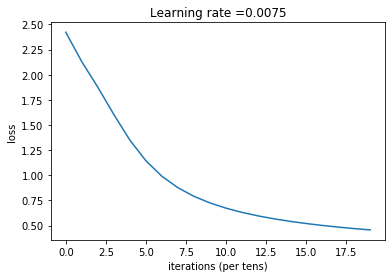

In [43]:
parameters = L_layer_model(train_set_x_new, train_set_y_new, dimensions, num_iterations = 2000, print_loss = True)

In [44]:
def predict(X, y, parameters):
    
    # Performs forward propogation using the trained parameters and calculates the accuracy
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    
    # Forward propagation
    probas, caches = L_layer_forward(X, parameters)
    
    p = np.argmax(probas, axis = 0)
    act = np.argmax(y, axis = 0)

    print("Accuracy: "  + str(np.sum((p == act)/m)))
        
    return p

Let's see the accuray we get on the training data.

In [45]:
pred_train = predict(train_set_x_new, train_set_y_new, parameters)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [3.92210421 3.76386627 0.47870527 ... 2.71982176 0.15544704 0.83947046]
 [2.18979102 1.55754488 1.05553715 ... 3.15760255 0.87908086 3.68483452]
 ...
 [0.62455765 0.         1.20102448 ... 1.51387082 0.35675394 1.29689469]
 [2.89559144 3.38367271 0.         ... 2.3628107  1.38069394 1.59205977]
 [0.01995846 1.25417537 0.         ... 0.10018506 1.53539673 0.64871247]]
Accuracy: 0.8774000000000002


We get ~ 88% accuracy on the training data. Let's see the accuray on the test data.

In [46]:
pred_test = predict(test_set_x, test_set_y, parameters)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.58437066 2.14632093 0.         ... 2.49019931 2.4644109  1.70537663]
 [1.8601915  1.61275767 1.01953799 ... 2.39709405 1.18191068 3.36825029]
 ...
 [0.03479091 0.82930186 0.89192424 ... 1.64131668 0.         1.2967743 ]
 [0.11871799 2.85192721 1.01214874 ... 0.95509881 2.35440916 4.81417132]
 [0.         1.58386188 2.07470393 ... 0.         1.1134132  1.00272637]]
Accuracy: 0.8674000000000002


It is ~87%. You can train the model even longer and get better result. You can also try to change the network structure. 
<br>Below, you can see which all numbers are incorrectly identified by the neural network by changing the index.

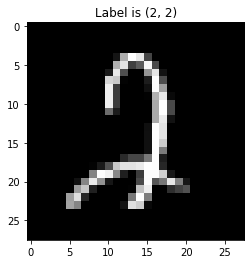

In [47]:
index  = 3474
k = test_set_x[:,index]
k = k.reshape((28, 28))
plt.title('Label is {label}'.format(label=(pred_test[index], np.argmax(test_set_y, axis = 0)[index])))
plt.imshow(k, cmap='gray')